In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
rcParams['figure.dpi'] = 500
rcParams["figure.figsize"] = (8,4)

# slide call
# jupyter nbconvert hummingbird_eda.ipynb --to=slides --SlidesExporter.reveal_number='c/t'

# Exploring & Explaining Data in the Wild

## March 13 2023

## Cait Harrigan

cait.harrigan@mail.utoronto.ca

<table><tr>
<td> <img src="https://images.squarespace-cdn.com/content/v1/5c8e9a223560c34f9070706f/dff07795-6826-42e4-9db7-61b182ce1ea8/Computer+Science.png?format=1000w" alt="UofT CS logo" style="width: 300px;"/> </td>
<td> <img src="https://datasciences.utoronto.ca/wp-content/uploads/2021/12/Logo.png" alt="DSI logo" style="width: 200px;"/> </td>
<td> <img src="https://vectorinstitute.ai/wp-content/uploads/2020/06/logo_uniligual_black_horizontal_trademark.png" alt="Vector logo" style="width: 200px;"/> </td>
</tr></table>

## Today: 

1. Context-aware data analysis 
2. EDA checklist
3. Practical example
4. Story building, extracting data insights


## Download this notebook & data:

https://github.com/harrig12/hummingbird_eda

![](https://github.com/harrig12/hummingbird_eda/blob/main/images/github_qr.jpg?raw=true)

## Where does your data come from?

| Data in the wild | "Domesticated" data |
| --- | --- | 
| <img src="https://images.unsplash.com/photo-1546182990-dffeafbe841d?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTV8fGxpb24lMjByb2FyfGVufDB8fDB8fA%3D%3D&w=1000&q=80" alt="lion" style="width: 100px;"/> | <img src="https://catastic.b-cdn.net/wp-content/uploads/2019/01/photo-1518791841217-8f162f1e1131.jpg" alt="cat" style="width: 100px;"/>|
| Messy | Clean! (relatively) |
| Domain expertise needed | Well studied benchmarks | 
| May require special handling (ethics approval, privacy, IP) | May be simulated, or otherwise not representative of the real world |


## Data analysis should be context-aware 

Depending on your context standards for how to treat your data will vary widely...

Some examples:
* A statistical theory researcher using linear regression as a toy model
* An uber intern training a model to keep an autonomous vehicle within road lines
* In my research, I look for underlying data structure which tells us something new about cancer biology



The nature of the data and problem setting shapes what approaches are suitable to the task. Our methods have to be selected with respect to potential risks and benefits, budget (time/compute/monetary), and standards of the field. 

The stats theorist might not be so interested in querying the data itself, but how their method behaves across all possible datasets

My uber intern probably wants to make sure they have high coverage of the data, few failure modes - or at least easily detectable failure modes. Risks: car crash! Generalization to new environments may be critical for this setting. 

For my data, if I find out something useful for even a subset of patients, this is a good result! Doesn't havet to apply to the whole dataset. Interpolation is more acceptable. Data access is tightly controlled for health privacy. 

## Your lion tamers: domain experts

Datasets tend to have hidden complexities that only reveal themselves once you’ve spent some time with them.

The domain expert is the person who knows about the technicalities of data collection, and is aware of the interests of your stakeholders. 

(Sometimes you have to act as both the datascientist, and the domain expert!) 

The domain expert is the person you have to ask your quesitons to 
Usually you have to look at the data first, before any suitable questions come up
They also parameterize the expectations/outcomes of an analysis 
Maybe we do a linear regression to find out the coefficient of correlation between variables, but it's the outside knowledge of the condition/limitations of the setting which actually makes this actionable.

## How to make effective use experts? 

### Challenges: 

* Querying the expert is expensve
* Getting on the same page
* **Asking the right questions**

* Querying the expert is expensve
    * limited time to discuss
    * minimal instructions
* Getting on the same page
    * establish the goals of the analysis (come back to these at the story telling stage) 
    * build a shared language
    * check your assumptions on the data
* Asking the right questions
    * critical to spend some time looking at the data before going to your expert
    * Most often, I find myself asking: "I saw xyz in the data. Is this expected?"

https://www.mrdbourke.com/a-gentle-introduction-to-exploratory-data-analysis/

## EDA is a separate activity from data storytelling

![](https://github.com/harrig12/hummingbird_eda/blob/main/images/eda_cycle_1.png?raw=true)

## EDA is a separate activity from data storytelling

![](https://github.com/harrig12/hummingbird_eda/blob/main/images/eda_cycle_2.png?raw=true)

## EDA is a separate activity from data storytelling

![](https://github.com/harrig12/hummingbird_eda/blob/main/images/eda_cycle_3.png?raw=true)

## "never trust summary statistics alone; always visualize your data"  - Albert Cairo

![](https://blog.revolutionanalytics.com/downloads/DataSaurus%20Dozen.gif)

Datasaurus Dozen http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html 

In [2]:
import seaborn as sns
import pandas as pd
from palmerpenguins import load_penguins
penguins = load_penguins()

## Simpson's paradox: be on the lookout for hidden structure in your data!


<center>
<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png" alt="palmer penguins" style="width: 300px;display:inline"/>
<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" alt="bill diagram" style="width: 300px;display:inline"/>
</center>




Artwork by @allison_horst

In [3]:
# load plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# load penguin data
from palmerpenguins import load_penguins
penguins = load_penguins()

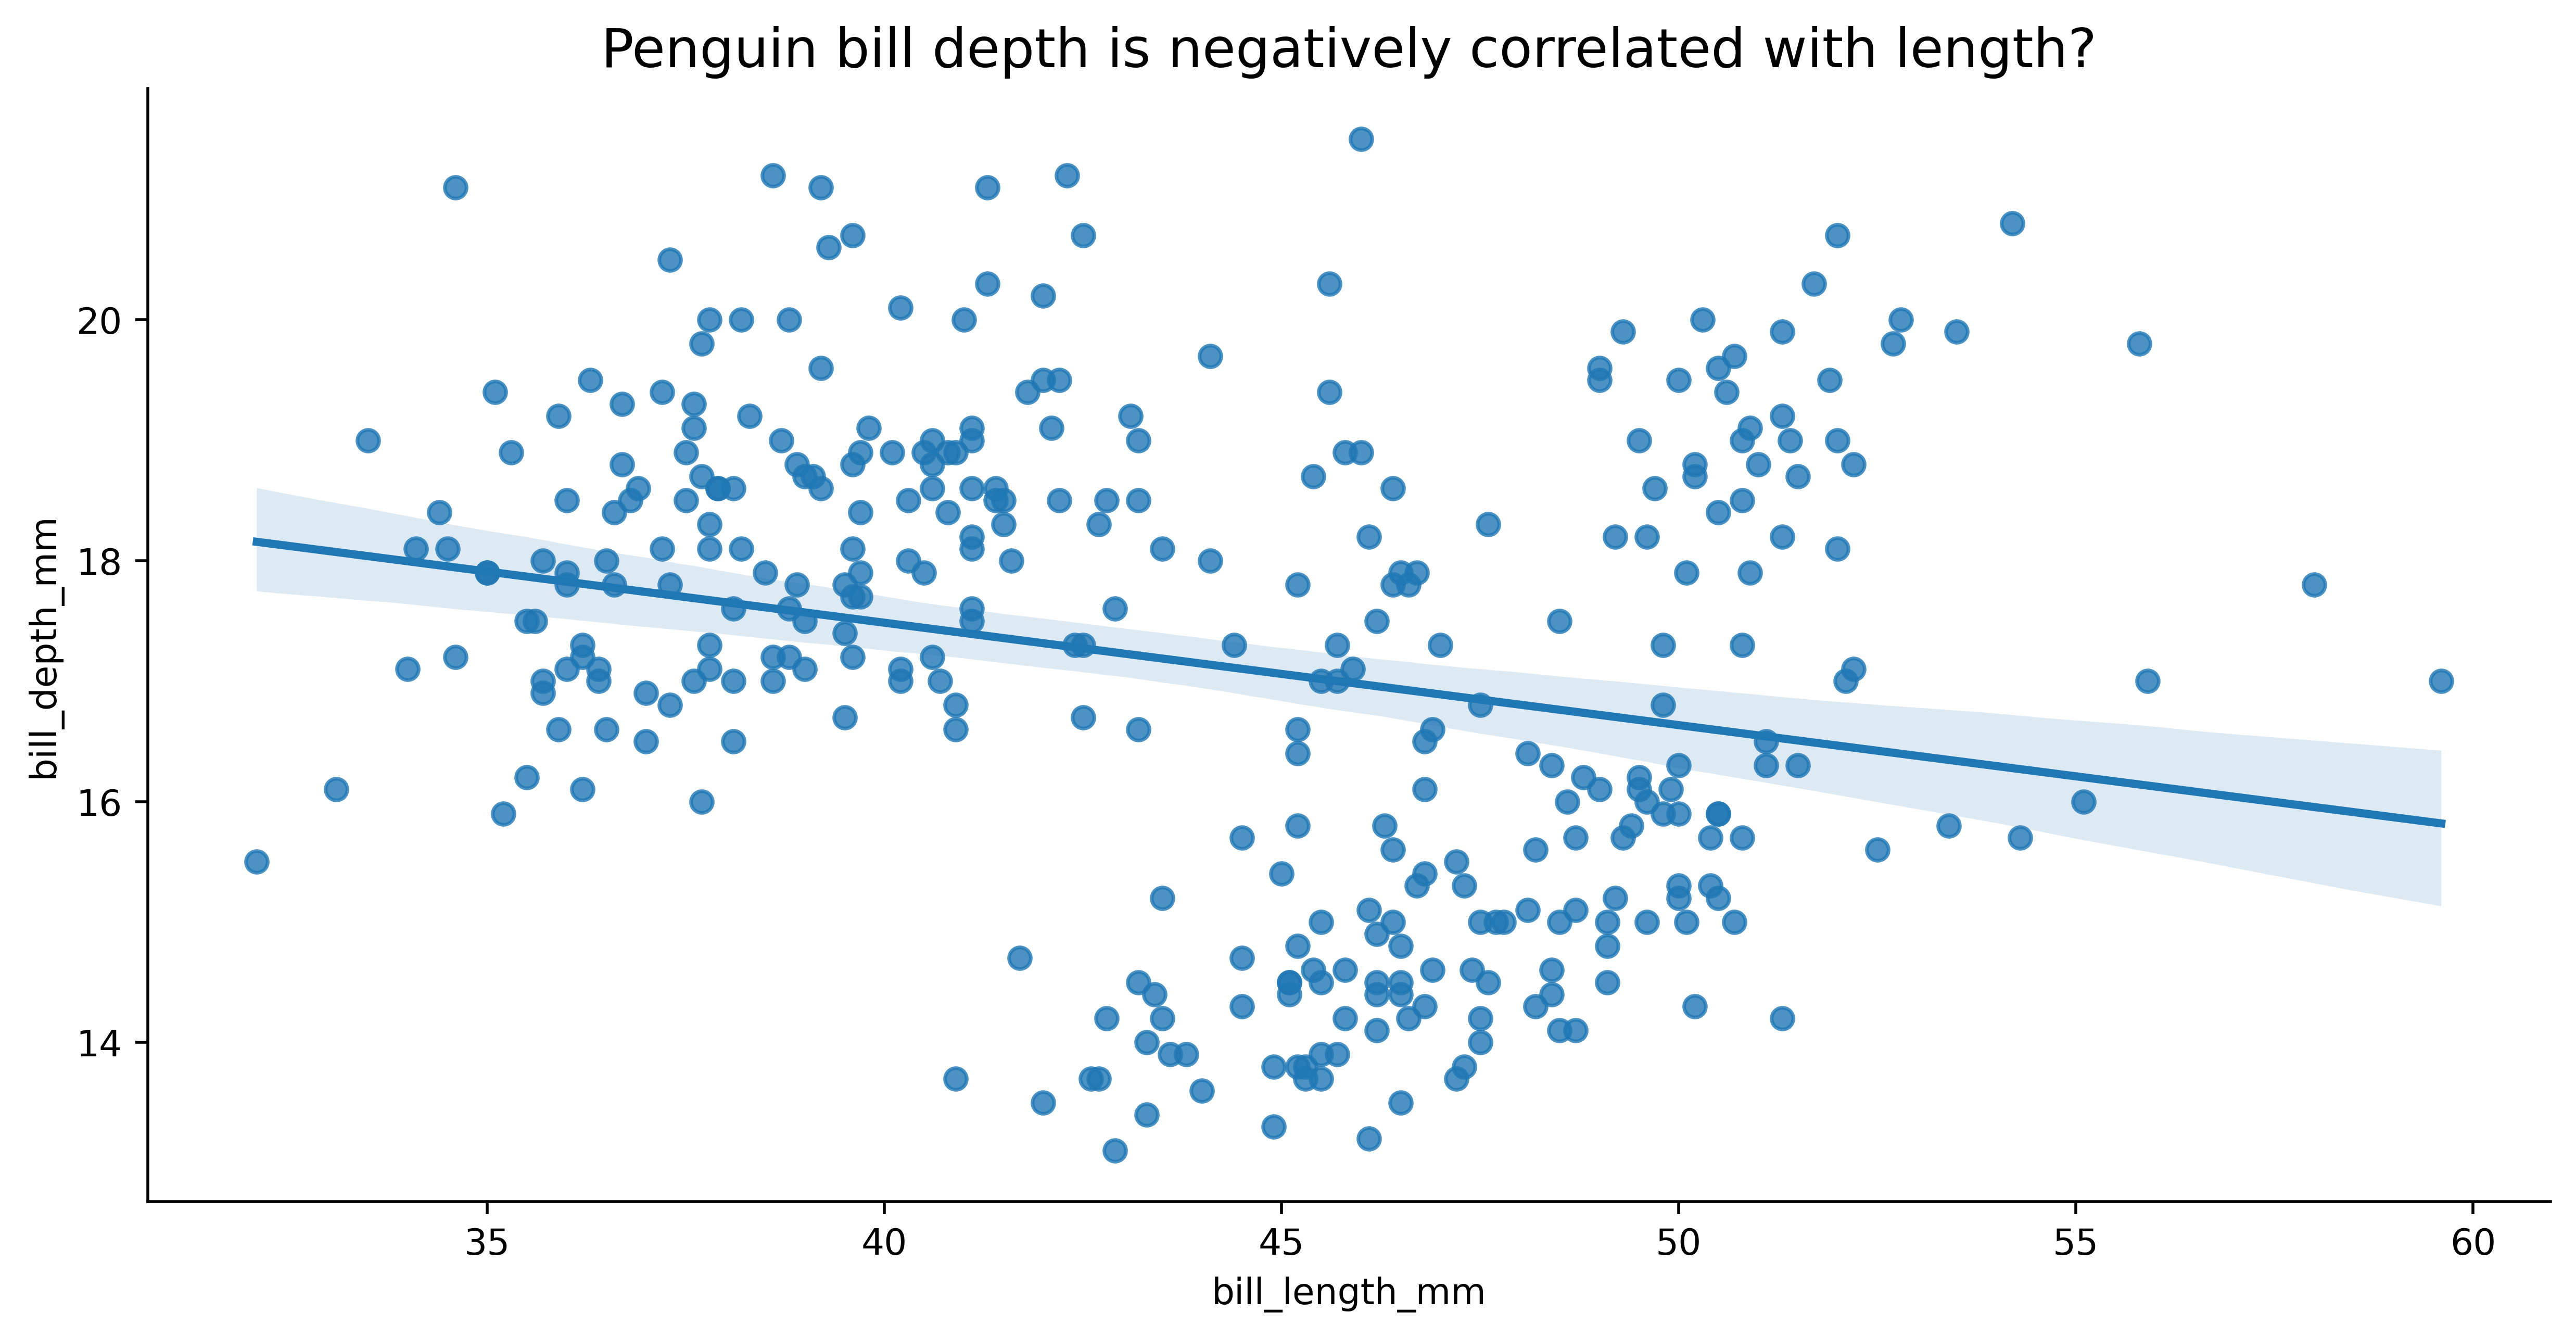

In [4]:
sns.lmplot(penguins, x='bill_length_mm', y='bill_depth_mm', aspect = 2)
plt.title('Penguin bill depth is negatively correlated with length?', fontsize = 15);

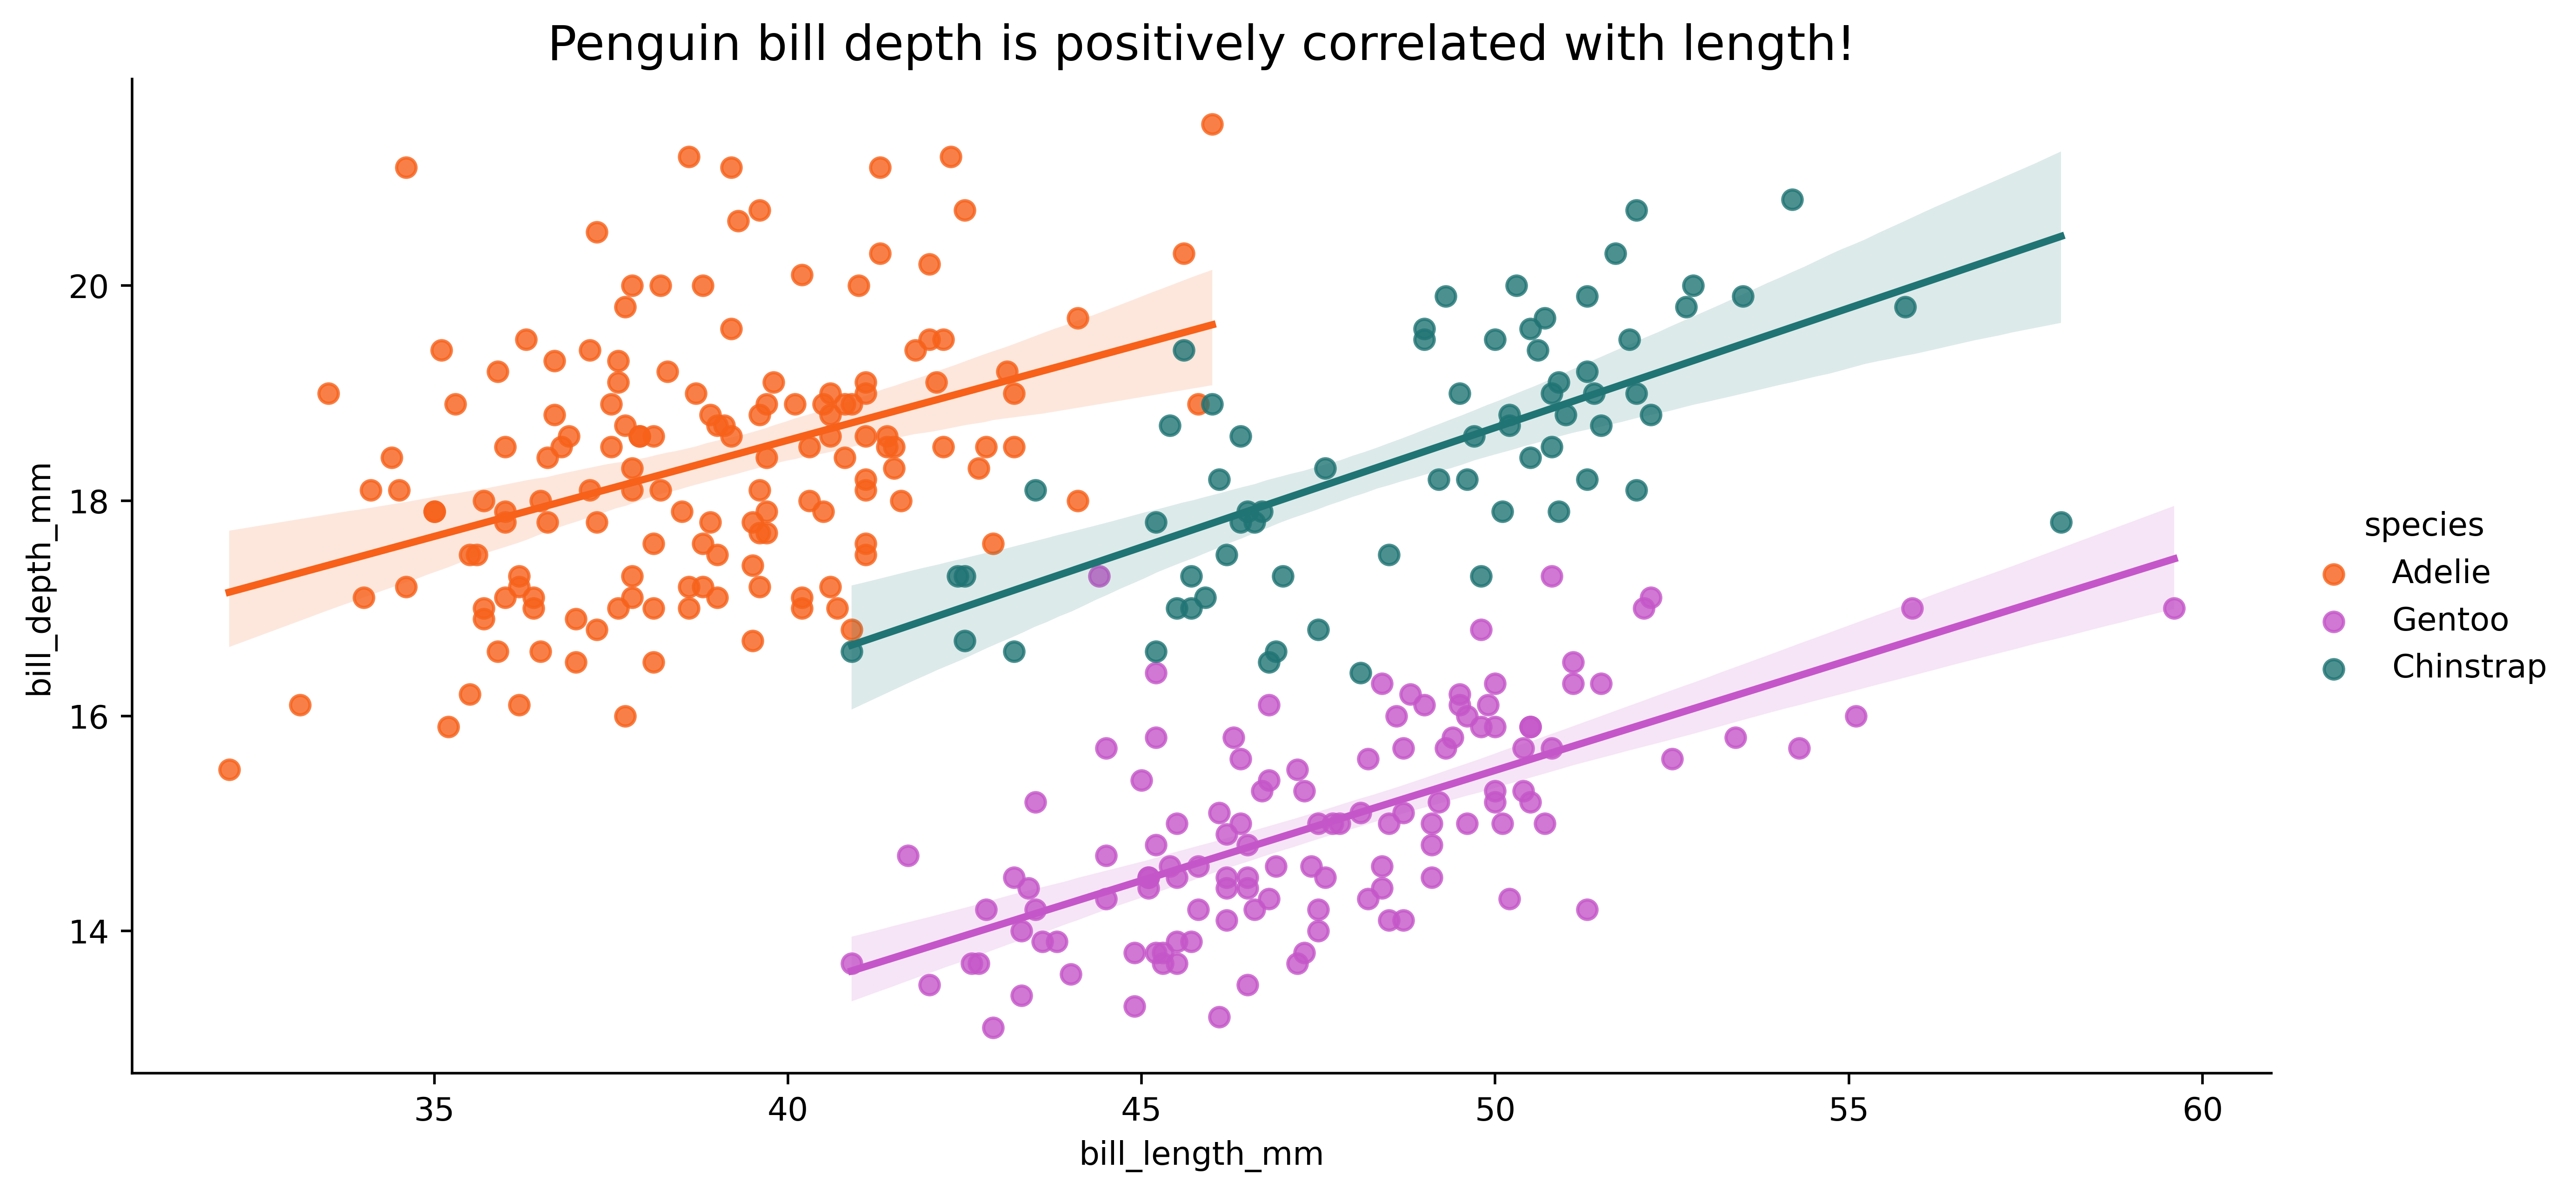

In [5]:
sns.lmplot(penguins, x='bill_length_mm', y='bill_depth_mm', aspect = 2,
           hue='species', palette = ['#F7611A', '#C556C9', '#207474'])
plt.title('Penguin bill depth is positively correlated with length!', fontsize = 15);

# Vignette: Citizen science project "Galiwatch''

* Based on Galiano Island, British Columbia
* Microclimate monitoring (temperature, air particles, weather, etc) 
* Tracking hummingbirds visiting the area 

https://galiwatch.ca/

## Two humming bird species: Anna and Rufous

<center>
<img src="https://github.com/harrig12/hummingbird_eda/blob/main/images/anna_id.png?raw=true" alt="annas hummingbird" style="width: 320px;display:inline;padding:1em"/> 
<img src="https://github.com/harrig12/hummingbird_eda/blob/main/images/rufous_id.png?raw=true" alt="rufous hummingbird" style="width: 320px;display:inline;paddig:1em;padding-bottom:.75em"/>
</center>


https://www.allaboutbirds.org/


## Data cleaning

* Cleaned up timestamps
* Missing data 
* Merged air quality and weather data (collected at different intervals) 


In [6]:
# Libraries we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load weather station data
weather = pd.read_csv('WS_hours.csv', na_values=['Nan', '--.-- ', '-- '])
# Format the timestamps
weather['timestamp'] = pd.to_datetime(weather.Date.astype(str).str[0:4] +
                                      '-' + weather.Date.astype(str).str[4:6] +
                                      '-' + weather.Date.astype(str).str[6:8] +
                                      ' ' + weather.Time)
# Convert to celsius
weather['Temperature C'] = (weather['Outdoor Temperature F'] - 32) * 5/9

In [8]:
weather.columns

Index(['Date', 'Time', 'Indoor Temperature F', 'Indoor Humidity %',
       'Outdoor Temperature F', 'Outdoor Humidity %', 'Wind Speed(mph)',
       'wind direction(Degree)', 'Light Intensity', 'UV index',
       'Daily Rainfall accumulation', 'Total Accumulative Rainfall',
       'Strike Count now', ' Daily Strike Count', 'Total Strike Count',
       'Closet Strike distance', 'Interference', 'barometric Pressure(real)',
       'Calibrated barometric Pressure', 'Dew Point', 'Rain Rate', 'wind gust',
       'Wind Speed average', 'Feels like', 'Heat Index', 'Wind Chill', ' ',
       'timestamp', 'Temperature C'],
      dtype='object')

In [9]:
# Load bird classifier data
bird = pd.read_csv('bird_detection.csv', index_col=0)
# Format timestamps
timestamp = bird['image'].str.split('.', expand=True)[0].str.replace('_', ' ')
bird['timestamp'] = pd.to_datetime(timestamp.str[0:13] + 
                                   ':' + timestamp.str[13:15] + ":00")

In [10]:
# Merge datasets
weather['merge_time'] = weather.timestamp.dt.strftime('%Y-%m-%d %H')
bird['merge_time'] = bird.timestamp.dt.strftime('%Y-%m-%d %H')
data = weather.merge(bird, on = 'merge_time', how = 'left')

In [11]:
# Keep only useful columns
data = data[['timestamp_x', 'xmin', 'ymin', 'xmax', 'ymax',
             'label', 'confidence', 'Temperature C', 
             'Outdoor Humidity %', 'Wind Speed(mph)', 'wind direction(Degree)',
             'Dew Point', 'Heat Index','Light Intensity', 'UV index', 
             'Rain Rate', 'wind gust','Wind Speed average',
             'Daily Rainfall accumulation','Total Accumulative Rainfall']]

# Remap some variables
data['bird_spotted'] = ~data['label'].isna()
data['Sex'] = data.label.map({0: 'Male', 1: 'Male', 2: 'Female', 3: np.NaN, 4: 'Female'})
data['Species'] = data.label.map({0: 'Rufous', 1: 'Anna', 2: 'Rufous', 3: np.NaN, 4: 'Anna'})
data = data.rename(columns={'timestamp_x': 'Timestamp'})
data['Date'] = data.Timestamp.dt.date
data = data.sort_values('Timestamp')
data = data[data['Timestamp'] >= bird['timestamp'].min()]
data = data[data['Timestamp'] <= bird['timestamp'].max()]

## Back to the EDA checklist

![](https://github.com/harrig12/hummingbird_eda/blob/main/images/eda_cycle_1.png?raw=true)

## Look at the data! 👀

In [12]:
data

Timestamp   xmin   ymin   xmax   ymax  label  confidence  \
1267  2021-04-20 17:00:00  626.0  404.0  820.0  544.0    0.0    0.983709   
53167 2021-04-20 17:00:00  626.0  404.0  820.0  544.0    0.0    0.983709   
53166 2021-04-20 17:00:00  222.0  384.0  386.0  474.0    0.0    0.978049   
1266  2021-04-20 17:00:00  222.0  384.0  386.0  474.0    0.0    0.978049   
27223 2021-04-20 17:00:00  626.0  404.0  820.0  544.0    0.0    0.983709   
...                   ...    ...    ...    ...    ...    ...         ...   
77527 2021-10-16 11:00:00    NaN    NaN    NaN    NaN    NaN         NaN   
51583 2021-10-16 11:00:00    NaN    NaN    NaN    NaN    NaN         NaN   
51584 2021-10-16 12:00:00  604.0  339.0  706.0  443.0    1.0    0.829207   
77528 2021-10-16 12:00:00  604.0  339.0  706.0  443.0    1.0    0.829207   
25628 2021-10-16 12:00:00  604.0  339.0  706.0  443.0    1.0    0.829207   

       Temperature C  Outdoor Humidity %  Wind Speed(mph)  ...  UV index  \
1267       17.833333                  32                2  ...         2   
53167      17.833333                  32                2  ...         2   
53166      17.833333                  32                2  ...         2   
1266       17.833333                  32                2  ...         2   
27223      17.833333                  32                2  ...         2   
...              ...                 ...              ...  ...       ...   
77527      11.388889                  97                0  ...         2   
51583      11.388889                  97                0  ...         2   
51584      11.611111                  97                1  ...         1   
77528      11.611111                  97                1  ...         1   
25628      11.611111                  97                1  ...         1   

       Rain Rate  wind gust  Wind Speed average  Daily Rainfall accumulation  \
1267        0.00          2                   2                         0.00   
53167       0.00          2                   2                         0.00   
53166       0.00          2                   2                         0.00   
1266        0.00          2                   2                         0.00   
27223       0.00          2                   2                         0.00   
...          ...        ...                 ...                          ...   
77527       0.02          1                   0                         0.56   
51583       0.02          1                   0                         0.56   
51584       0.01          1                   0                         0.57   
77528       0.01          1                   0                         0.57   
25628       0.01          1                   0                         0.57   

       Total Accumulative Rainfall  bird_spotted   Sex  Species        Date  
1267                          0.59          True  Male   Rufous  2021-04-20  
53167                         0.59          True  Male   Rufous  2021-04-20  
53166                         0.59          True  Male   Rufous  2021-04-20  
1266                          0.59          True  Male   Rufous  2021-04-20  
27223                         0.59          True  Male   Rufous  2021-04-20  
...                            ...           ...   ...      ...         ...  
77527                         7.96         False   NaN      NaN  2021-10-16  
51583                         7.96         False   NaN      NaN  2021-10-16  
51584                         7.97          True  Male     Anna  2021-10-16  
77528                         7.97          True  Male     Anna  2021-10-16  
25628                         7.97          True  Male     Anna  2021-10-16  

[73089 rows x 24 columns]

## What do the variables mean? 


| Variable Name | Description | 
| - | - | 
| Timestamp | timestamp of image containing identified object| 
| xmin, xmax, ymin, ymax | borders of an object bounding box |
| label | predicted object class label | 
| confidence | prediction confidence | 
| Temperature C | hourly average temperature (in celsius) | 

<center>
<img src="https://github.com/harrig12/hummingbird_eda/blob/main/images/bbox2.jpg?raw=true" alt="annas hummingbird" style="width: 500px;display:block"/> 
</center>



## What do the labels mean? 





| Label | Class | 
| - | - |
| 0 | Rufous_Male
| 1 | Annas_Male
| 2 | Rufous_Female
| 3 | Person
| 4 | Annas_Female




### Assumption: probably should filter out the low-confidence predictions, and the people

In [13]:
data = data[(data['confidence'] > 0.7) | (data['confidence'].isna())]
data = data[data['label'] != 3]

### Assumption: data is representative

In [14]:
print('Dataset spans from ' + str(data['Date'].min()) +
      ' to ' + str(data['Date'].max()))

Dataset spans from 2021-04-20 to 2021-10-16



## Exploratory plots

Histograms, scatterplots are good for getting a feel for your data

Quick statistical diagnostics can be very useful (R-square, p-test, QQ plot)


## What was summer 2021 like?

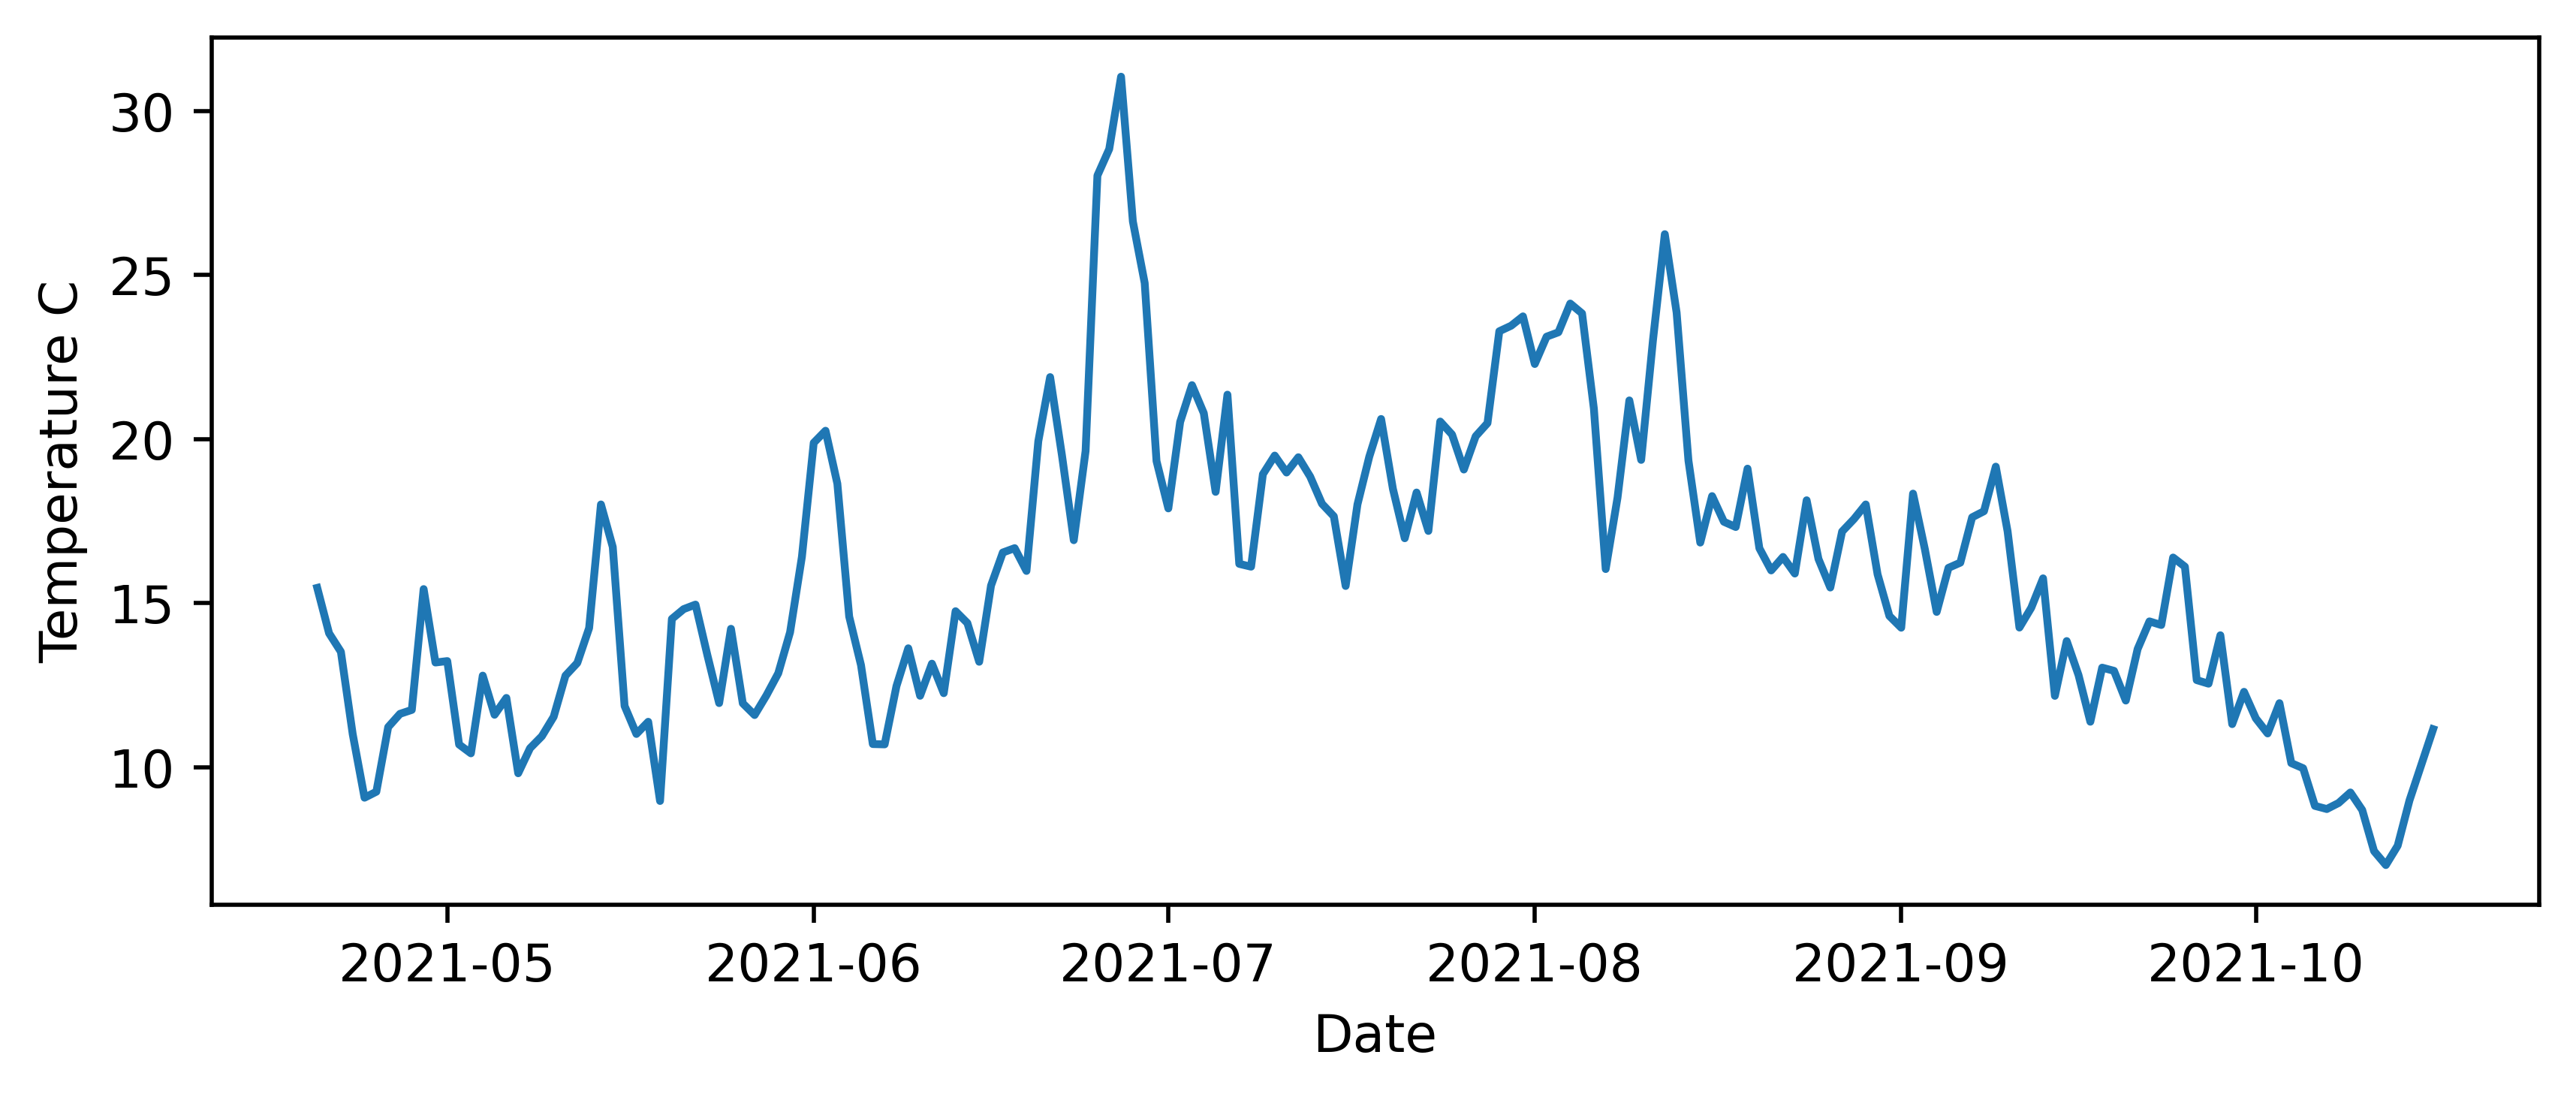

In [15]:
fig, ax = plt.subplots(1,1, figsize = (8,3))
sns.lineplot(data, x='Date', y='Temperature C', ci=False);

### Conclusion: Temperature peaks in early July 

## What is the relationship between different weather variables?

In [16]:
data['Hour'] = data['Timestamp'].dt.hour
df = data[['Hour', 'Temperature C', 'Outdoor Humidity %', 
              'Dew Point']].groupby(['Hour'], as_index=False).mean()
sns.pairplot(df, diag_kind="kde", corner=True, palette="viridis")
plt.close()

<center>
<img src="https://github.com/harrig12/hummingbird_eda/blob/main/images/pairplot1.png?raw=true" alt="pairplot" style="width: 450px;display:block"/> 
</center>


### Conclusion: Peak daily temperature is around 3pm. With increased temperature, we generally see decreased humidity.

## Investigate circular Dew Point 

In [17]:
data['Hour'] = data['Timestamp'].dt.hour
data['Month'] = pd.Categorical(data['Timestamp'].dt.month)
df = data[['Month', 'Hour', 'Temperature C', 'Outdoor Humidity %', 
              'Dew Point']].groupby(['Month','Hour'], as_index=False).mean()
sns.pairplot(df, diag_kind="kde", corner=True, hue = 'Month',  palette="viridis", diag_kws={'hue': None})
plt.close()

<center>
<img src="https://github.com/harrig12/hummingbird_eda/blob/main/images/pairplot2.png?raw=true" alt="pairplot" style="width: 450px;display:block"/> 
</center>


### Conclusion: Relationship between Dew Point, Temperature, and Humidity chages over the season

# Bonus: can colour these by sex, species as a quick diagnostic 

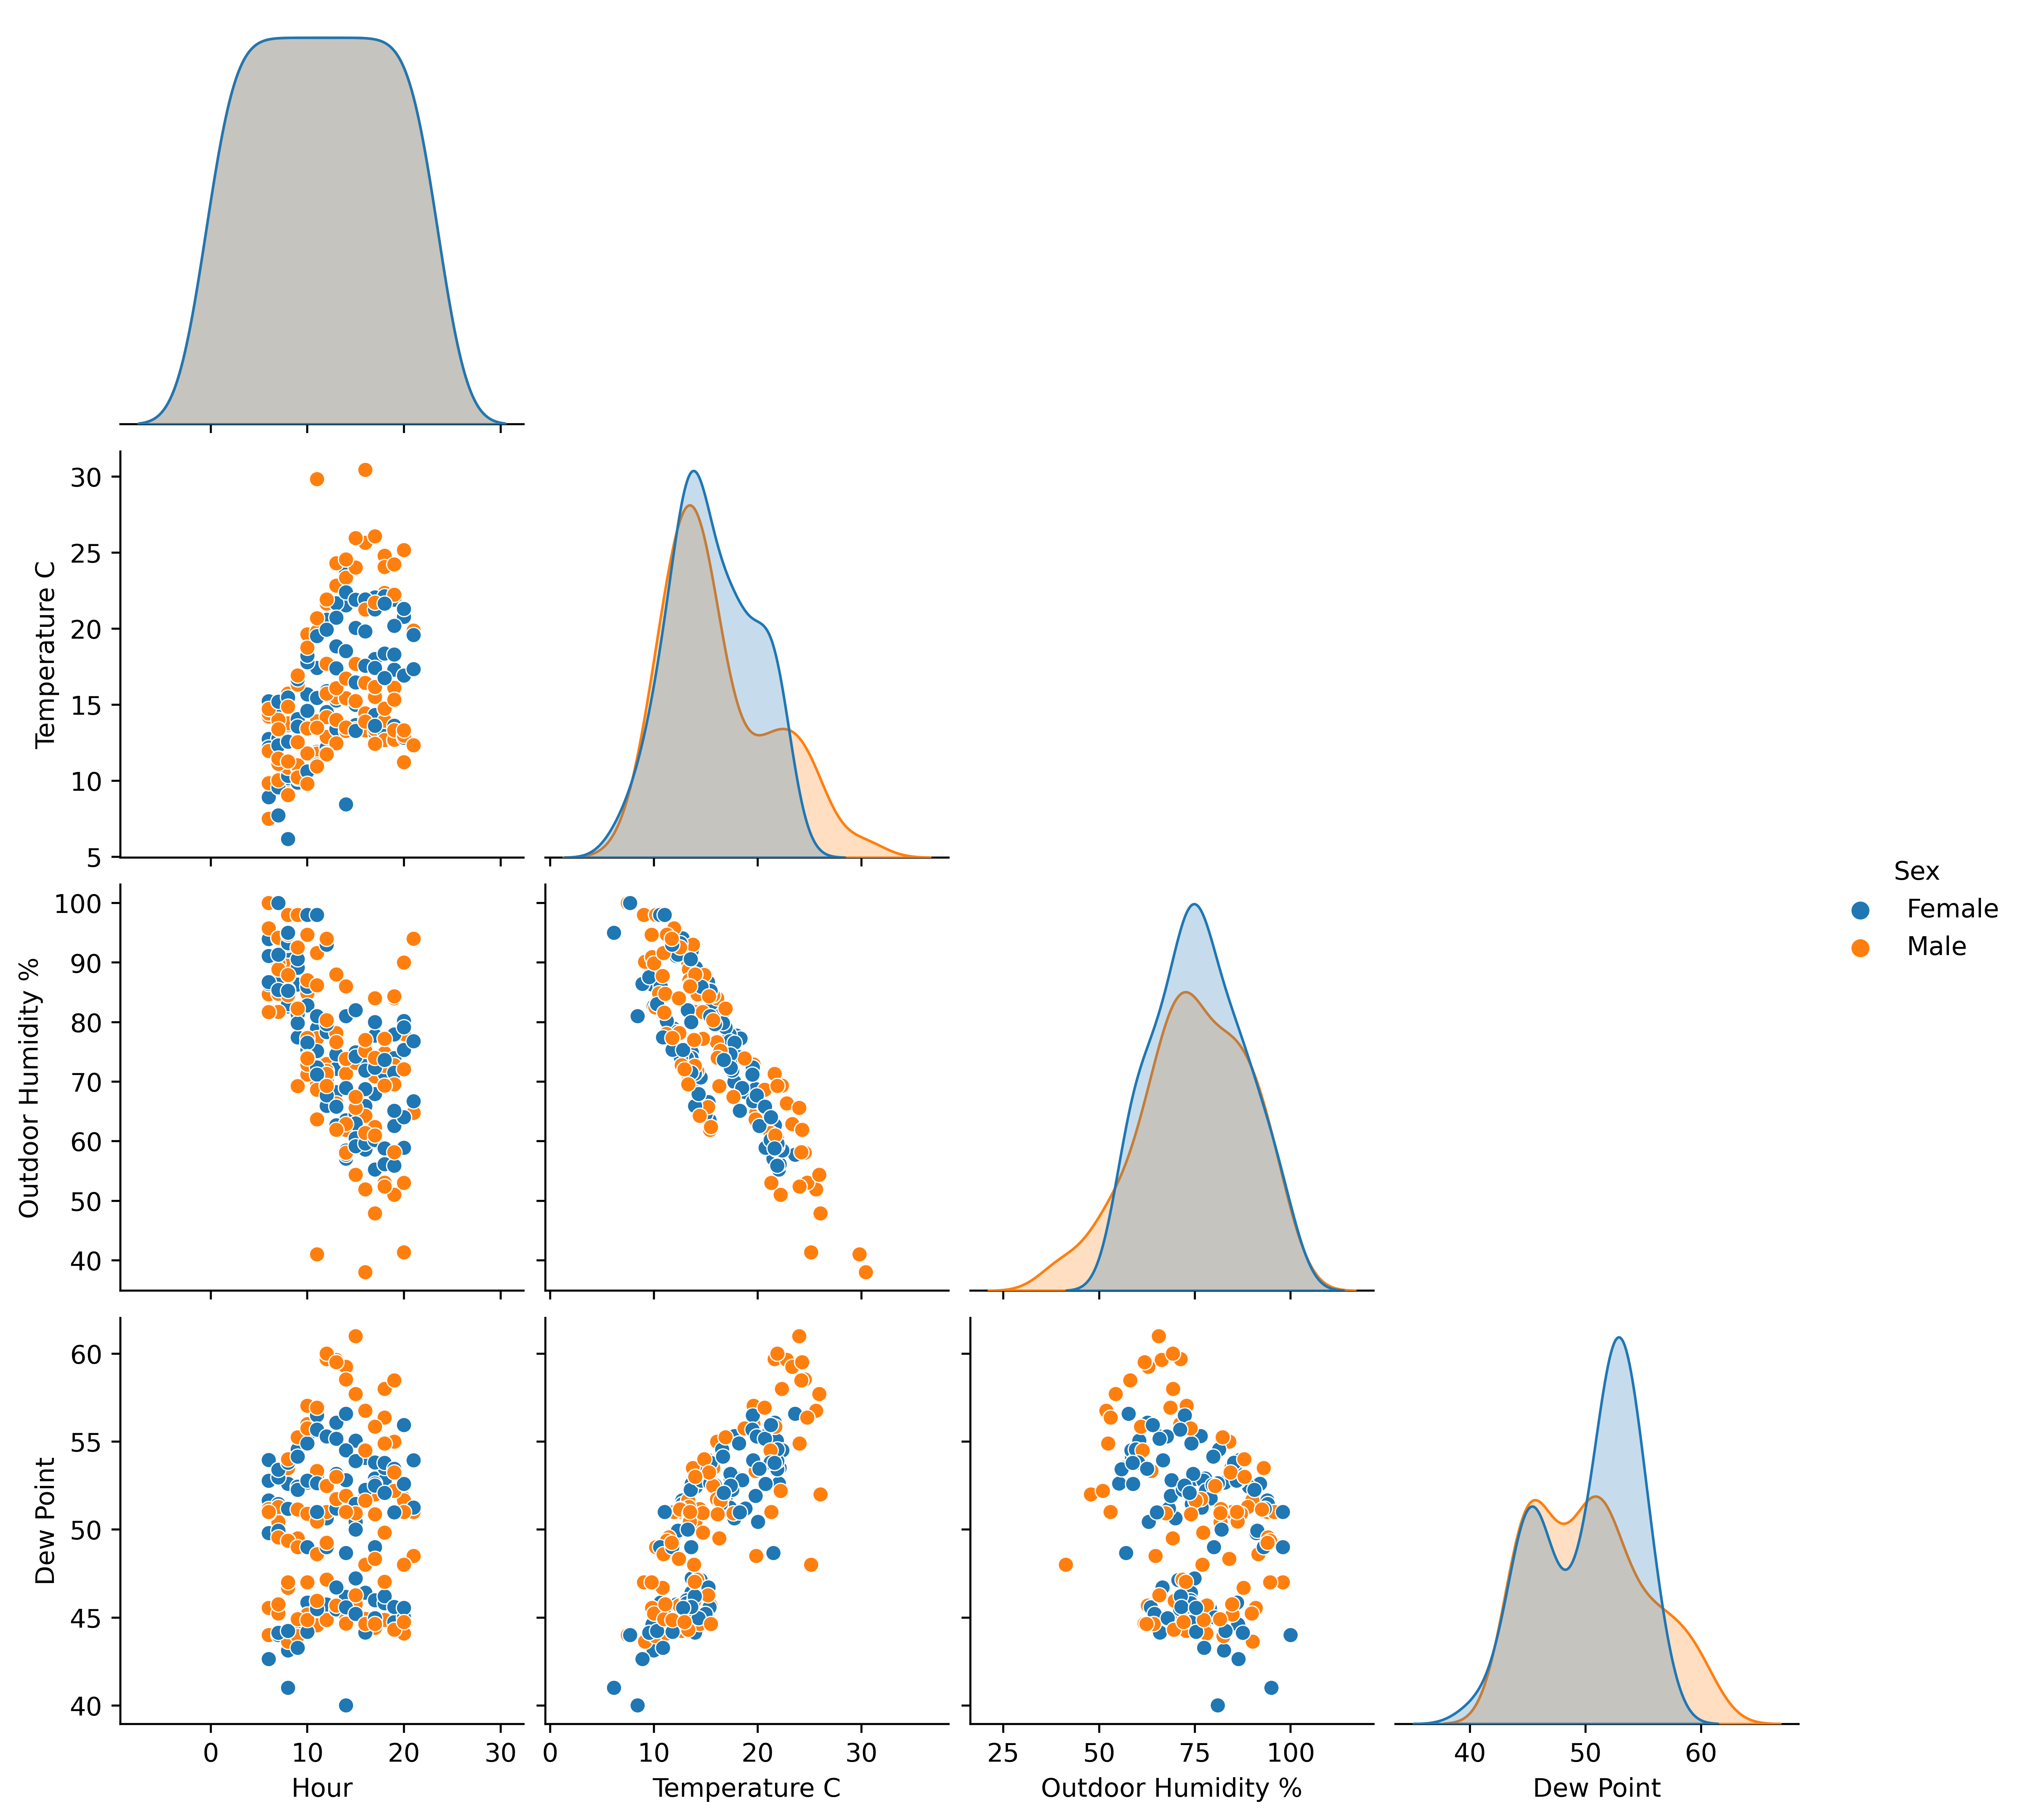

In [18]:
# Colour by sex
data['Hour'] = data['Timestamp'].dt.hour
data['Month'] = pd.Categorical(data['Timestamp'].dt.month)
df = data[['Month', 'Hour', 'Temperature C', 'Outdoor Humidity %', 'Sex', 'Species',
              'Dew Point']].groupby(['Month','Hour', 'Sex'], as_index=False).mean()
sns.pairplot(df, diag_kind="kde", corner=True, hue = 'Sex');

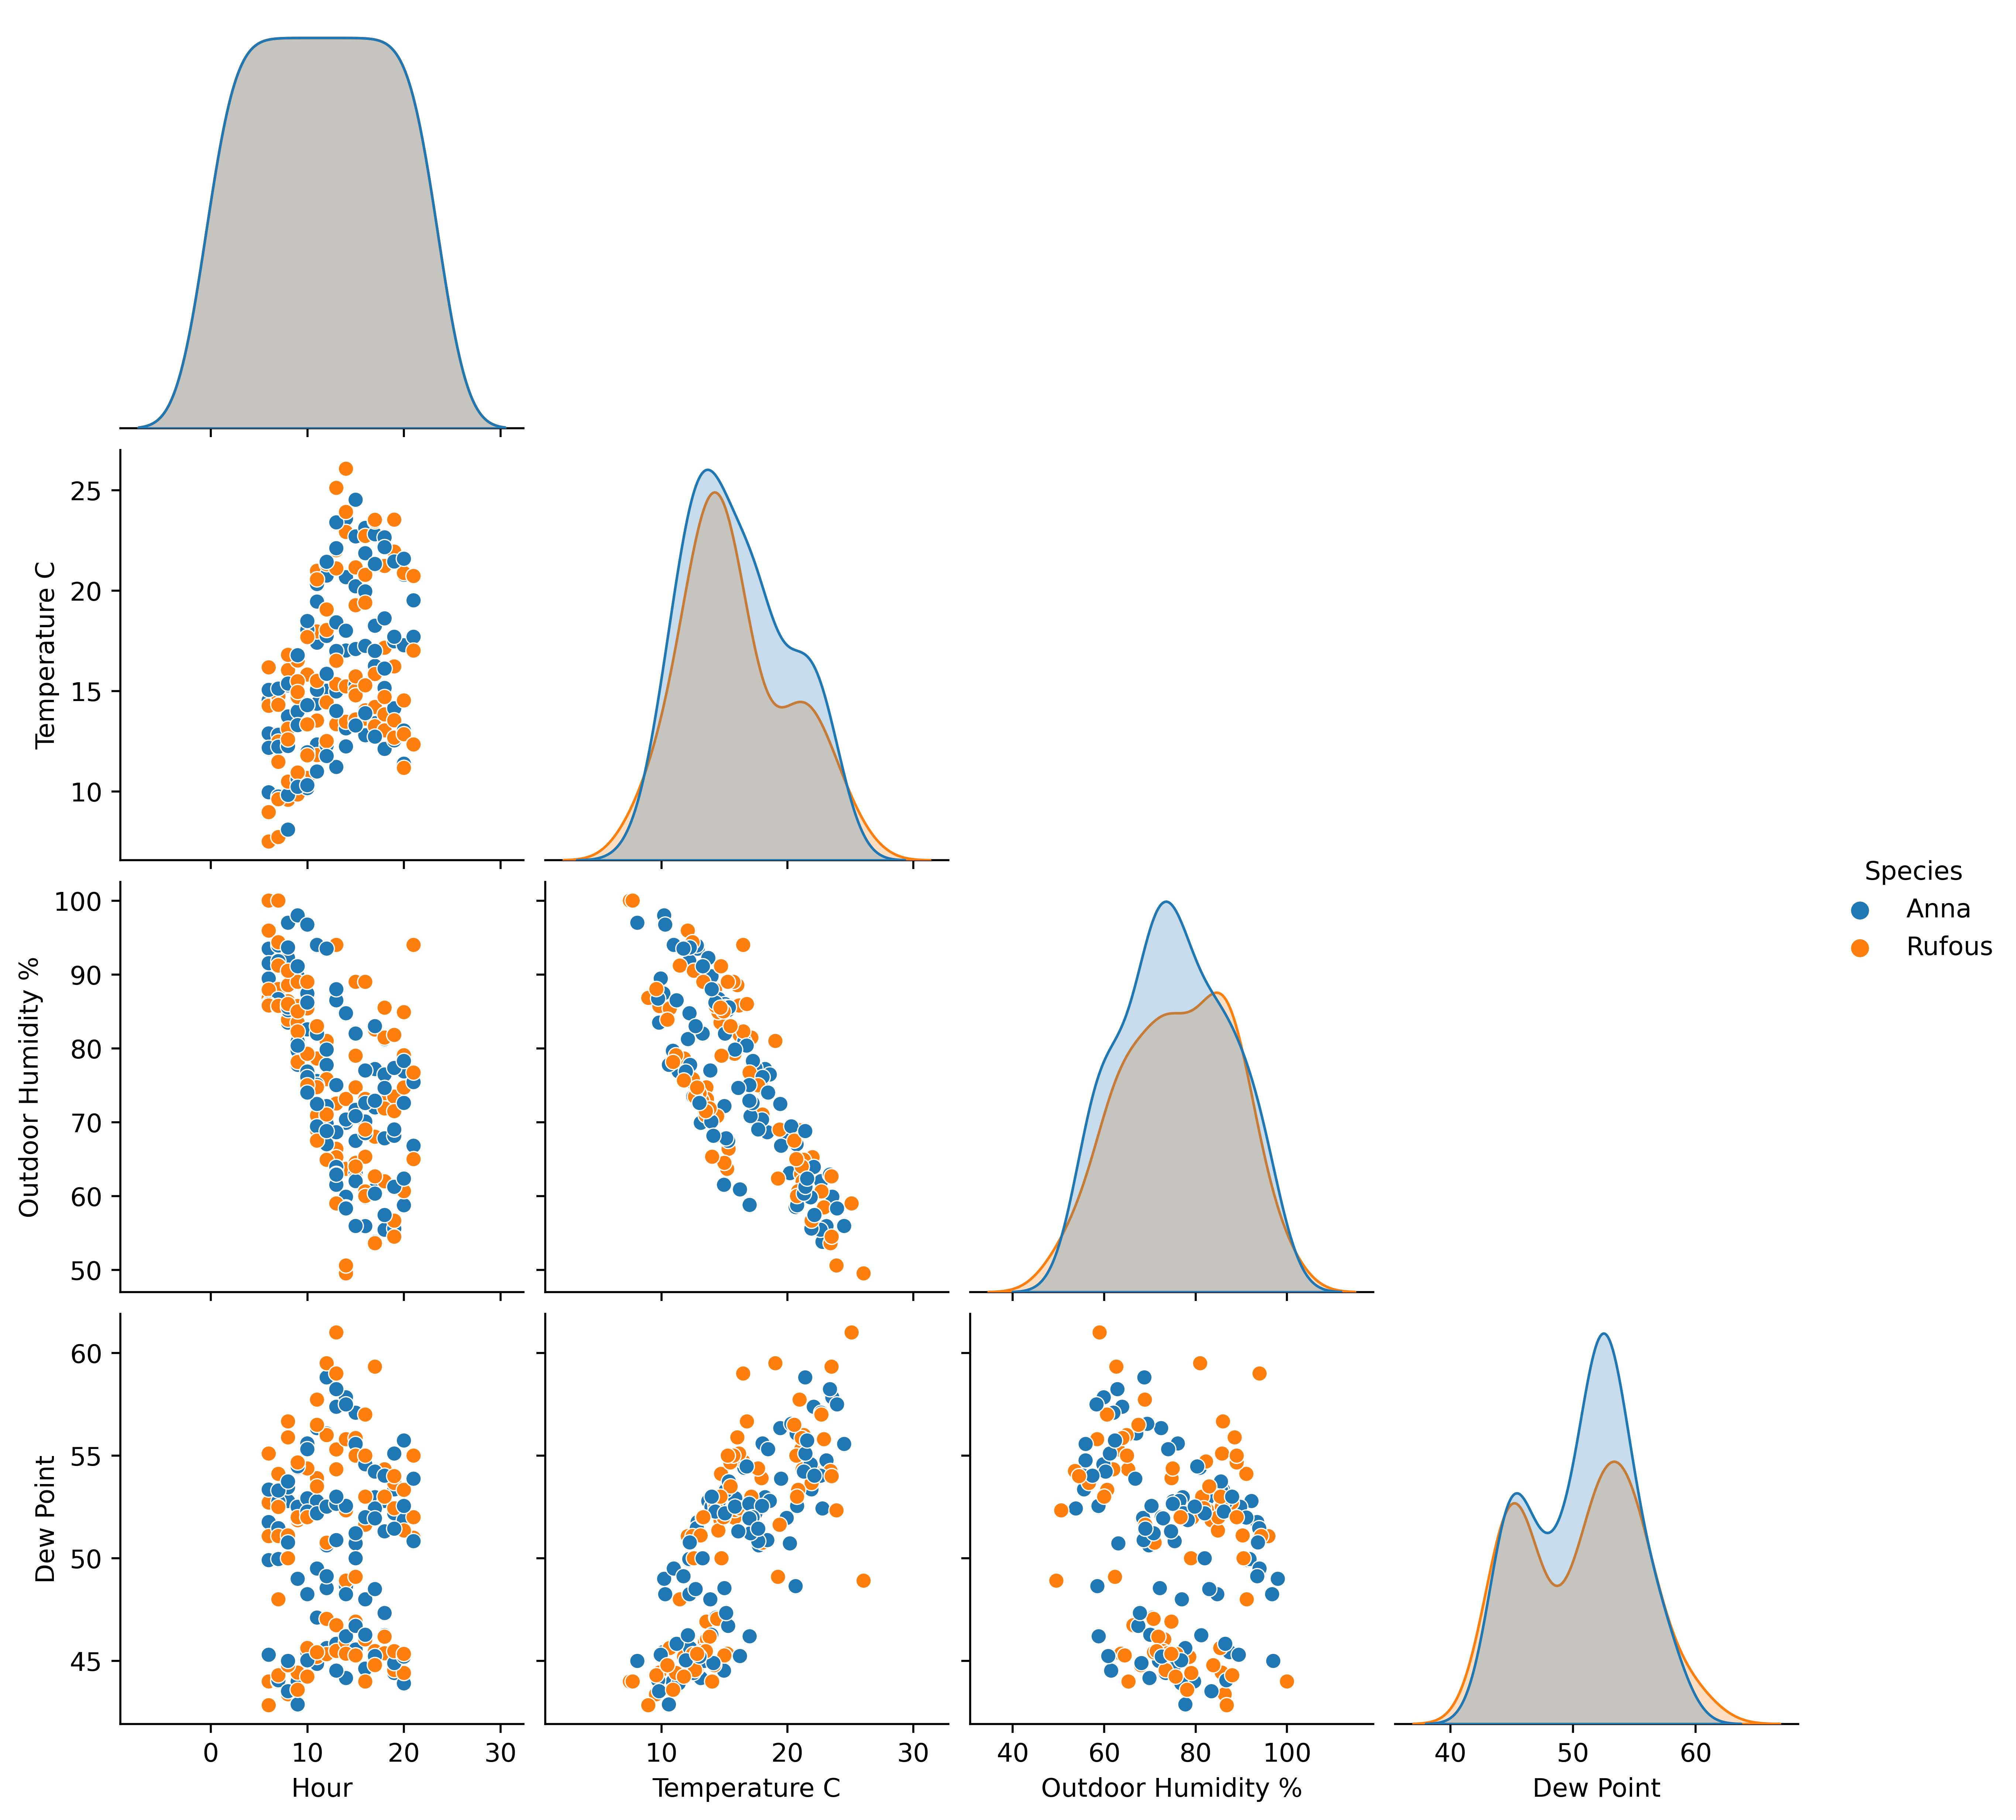

In [19]:
data['Hour'] = data['Timestamp'].dt.hour
data['Month'] = pd.Categorical(data['Timestamp'].dt.month)
df = data[['Month', 'Hour', 'Temperature C', 'Outdoor Humidity %', 'Sex', 'Species',
              'Dew Point']].groupby(['Month','Hour', 'Species'], as_index=False).mean()
sns.pairplot(df, diag_kind="kde", corner=True, hue = 'Species');

## (Bonus) Do birds care about the weather? 

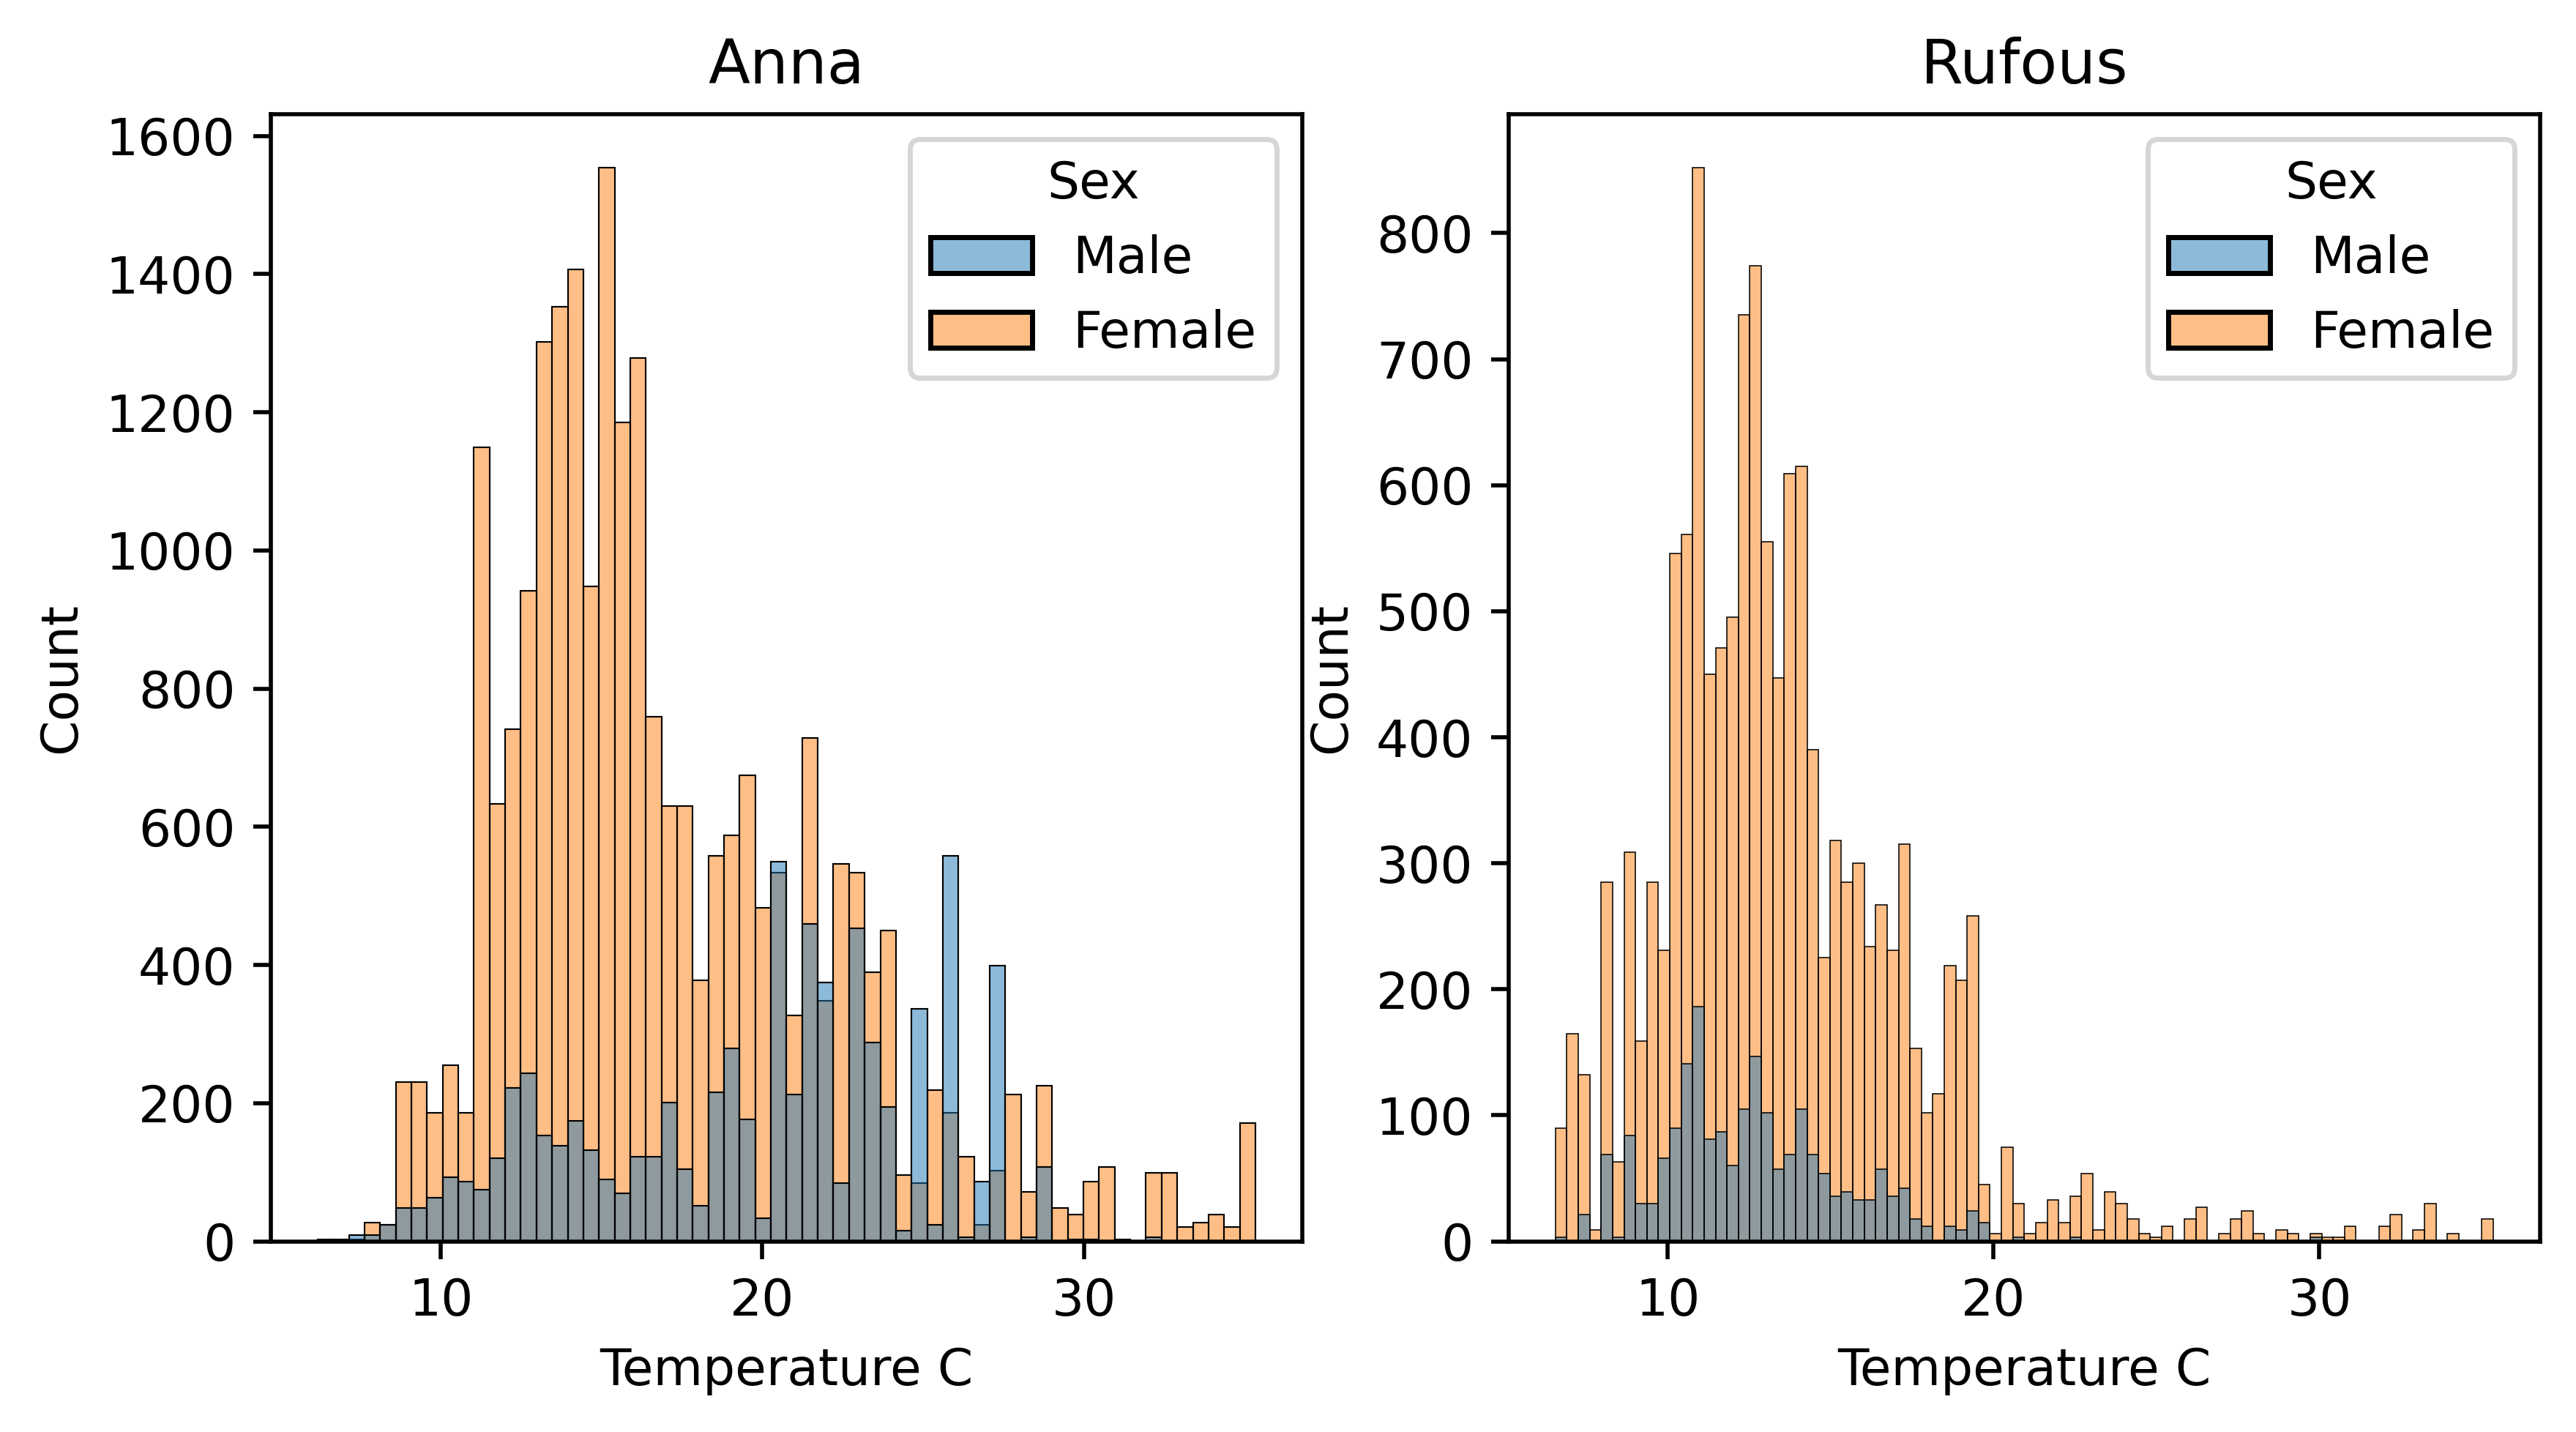

In [20]:
fix, ax = plt.subplots(1,2)
sns.histplot(data[data['Species']=='Anna'], x='Temperature C', hue = 'Sex', ax=ax[0])
sns.histplot(data[data['Species']=='Rufous'], x='Temperature C', hue = 'Sex', ax=ax[1])
ax[0].set_title('Anna')
ax[1].set_title('Rufous');

### Conclusion: Male Annas prefers hotter weather compared to female Annas, not true for Rufous

## When in the year do birds visit the feeder?

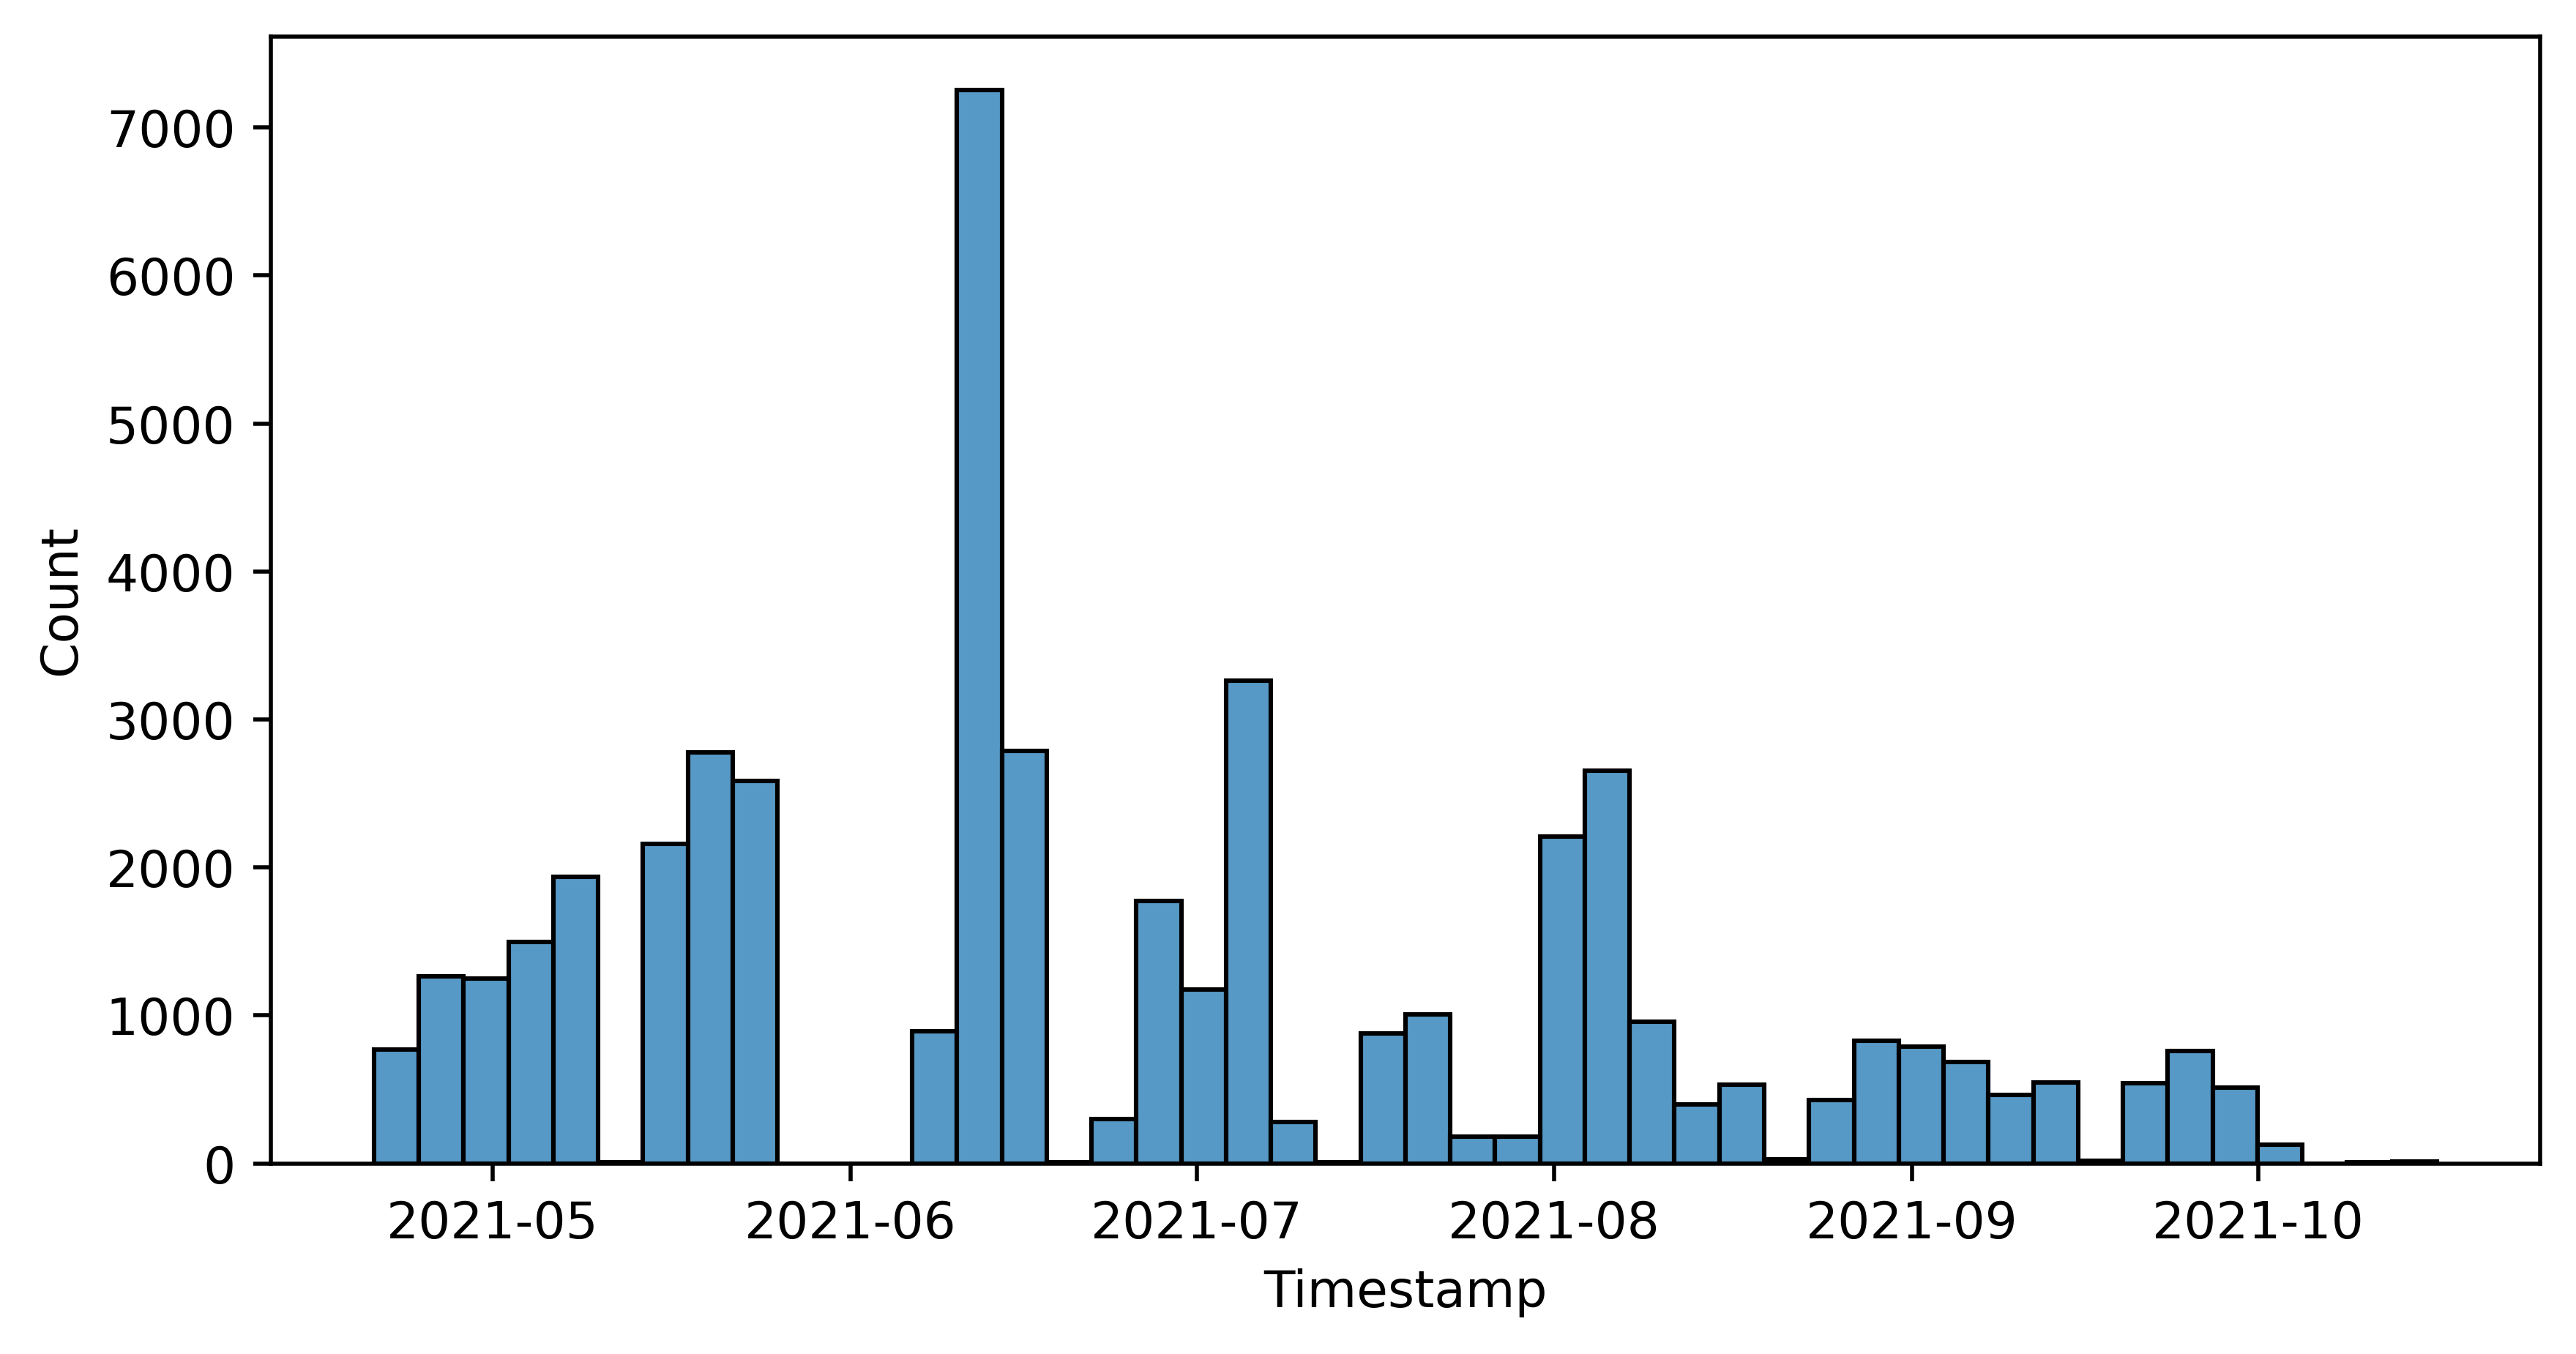

In [21]:
sns.histplot(data[data['bird_spotted'] == True], x = 'Timestamp');

### Conclusion: Birds visit most in June - August

## When in the day do birds visit the feeder?

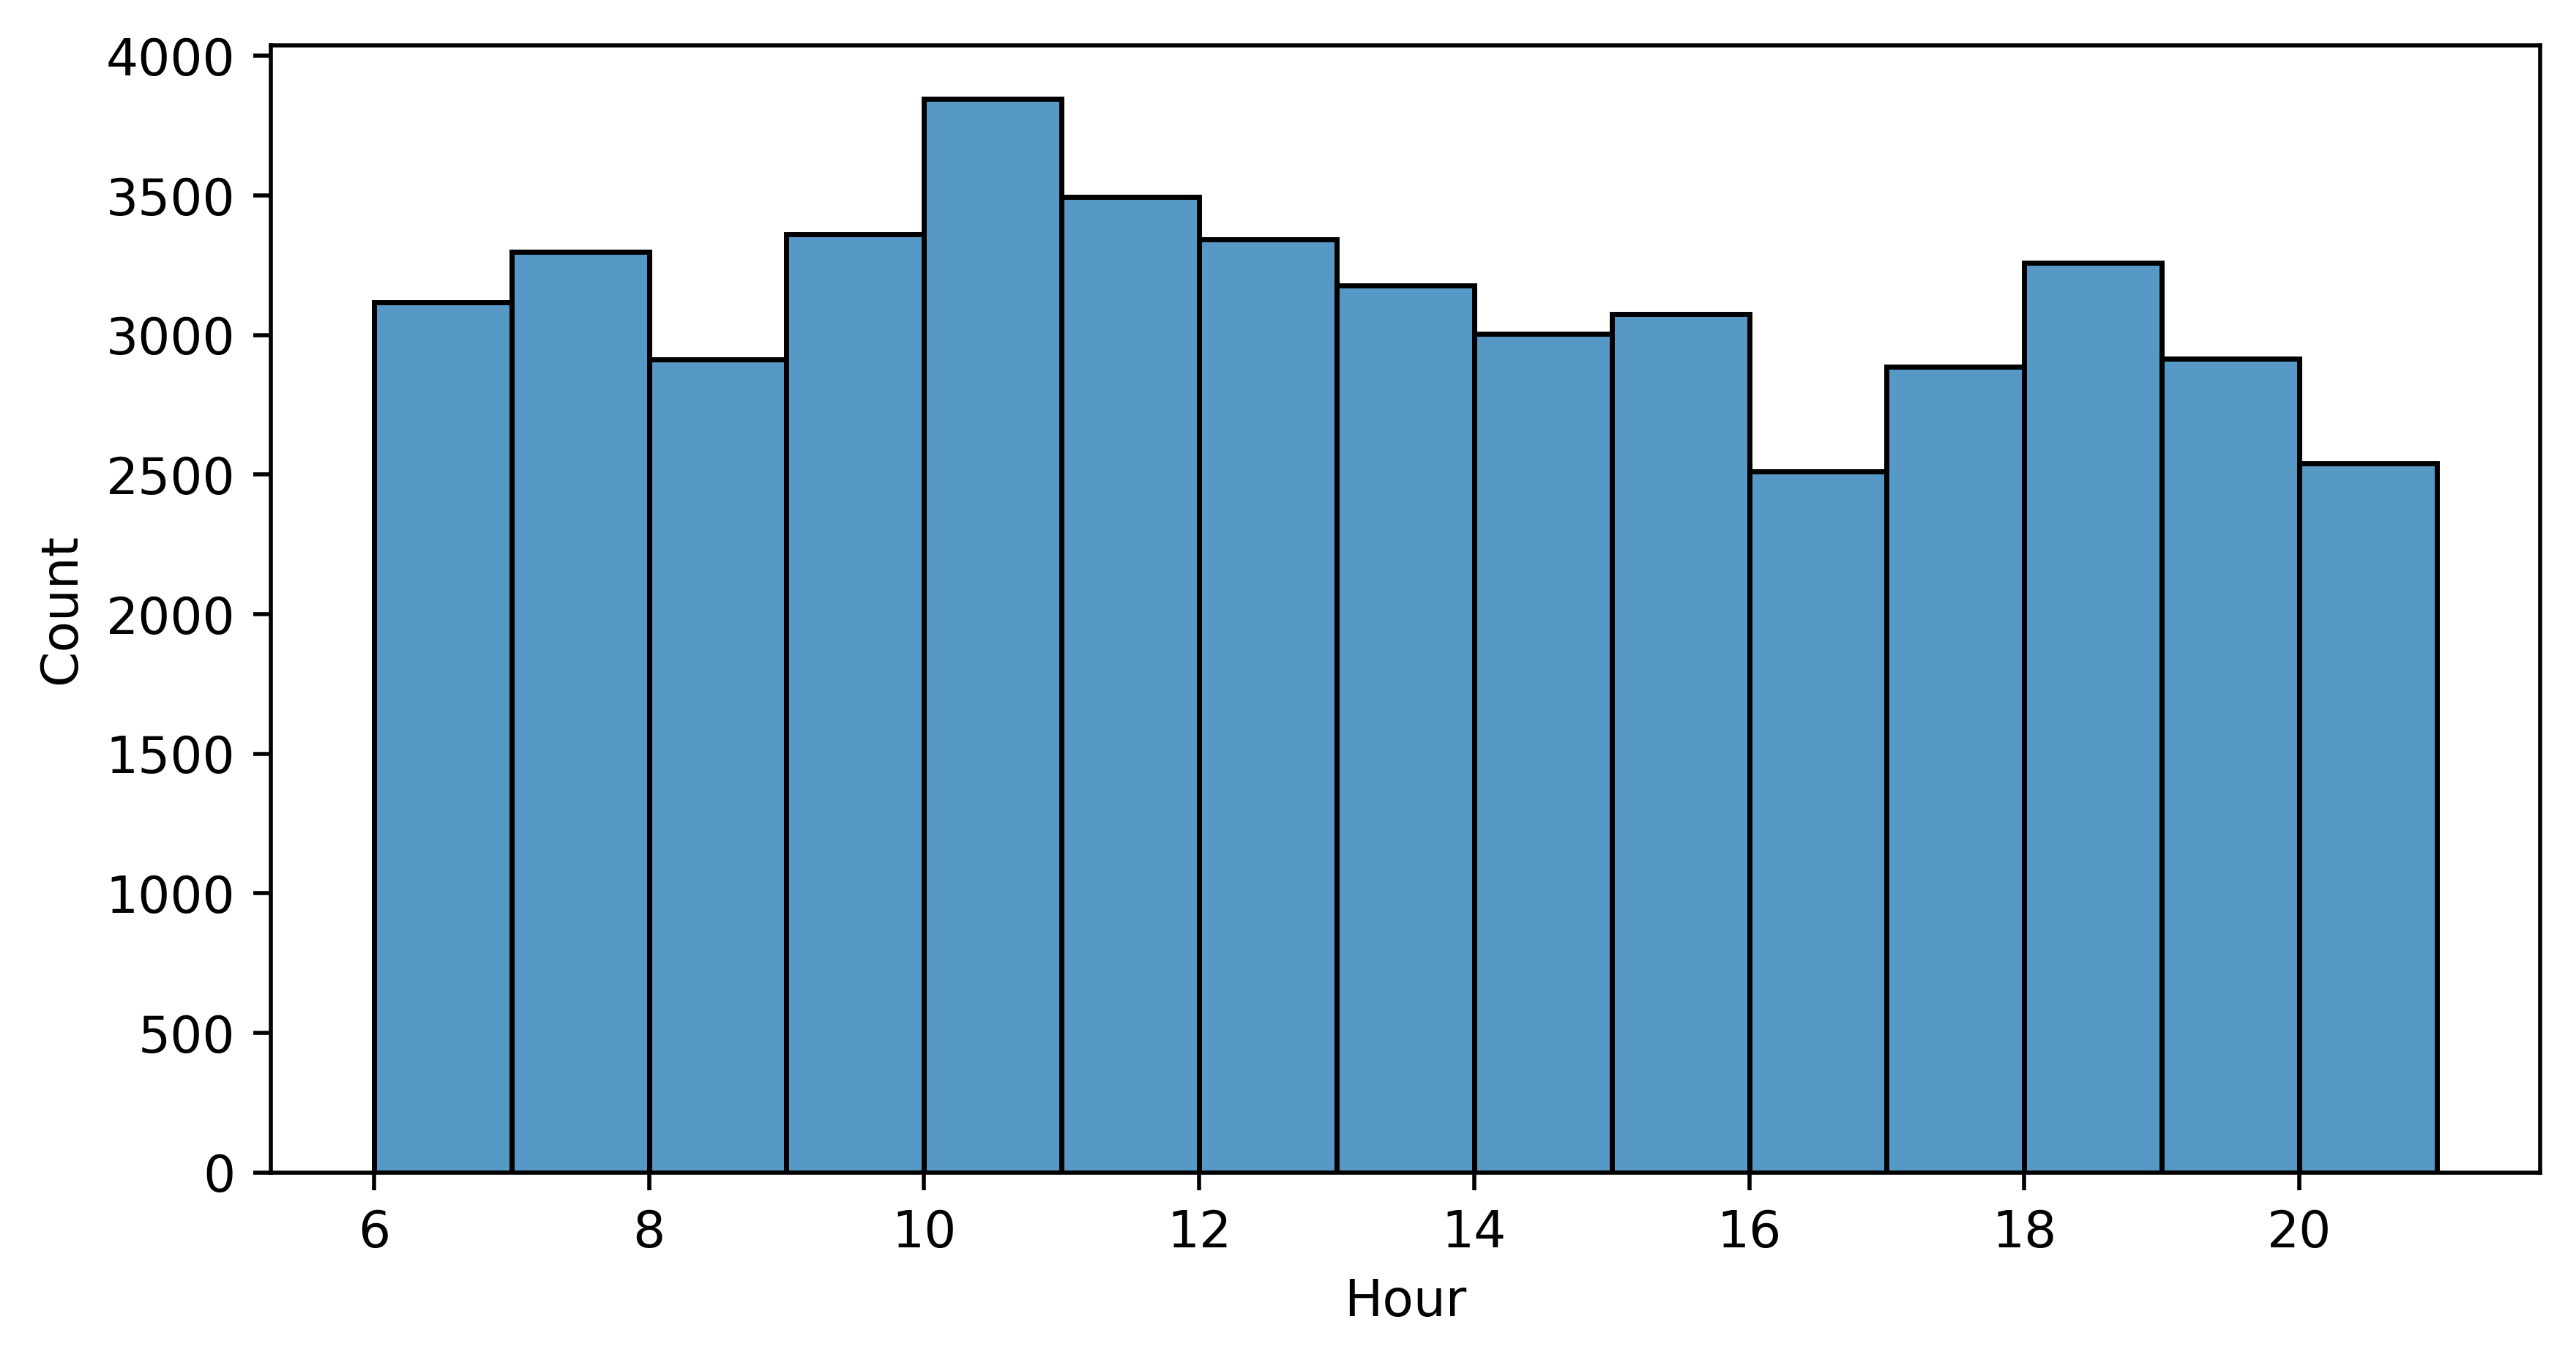

In [22]:
data['Hour'] = data.Timestamp.dt.hour
sns.histplot(data[data['bird_spotted'] == True], x='Hour', binwidth=1);

### Conclusion: Birds visit in the day between 6am and 9pm

## Do birds care about the weather?

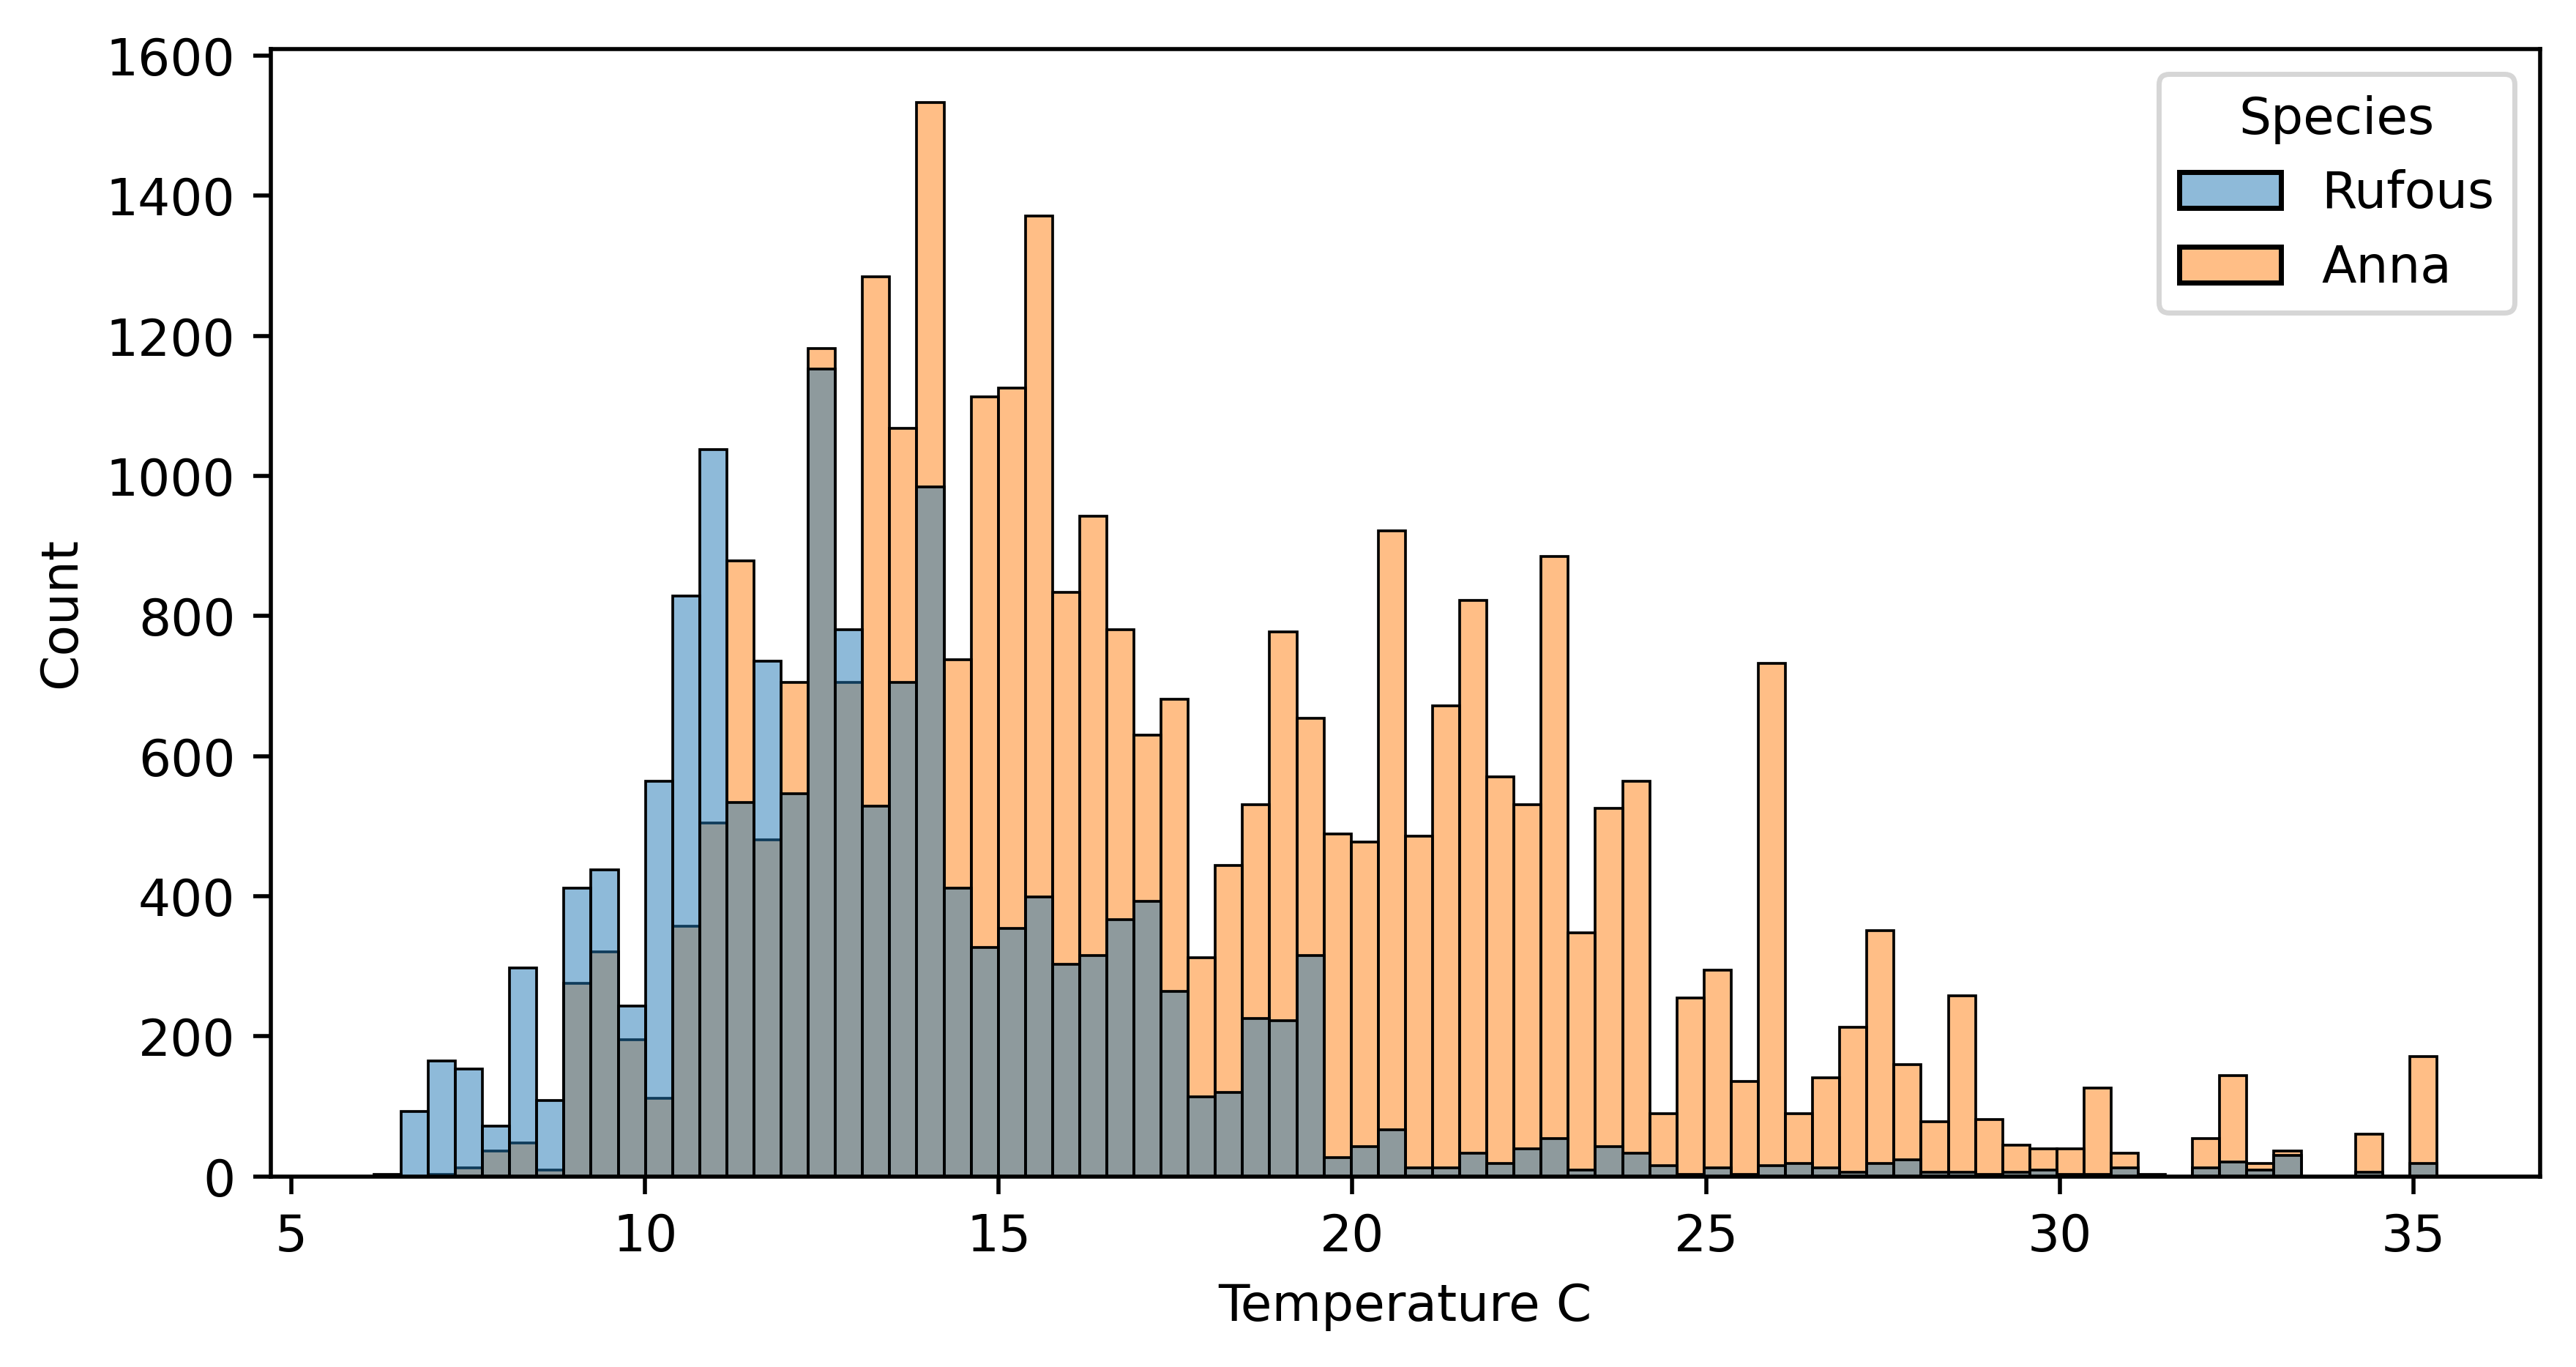

In [23]:
sns.histplot(data[data['bird_spotted'] == True], x ='Temperature C', hue = 'Species');

### Conclusion: Anna's humming bird prefers hotter weather

## Talk to an expert

I brought my exploratory plots to an expert, and went through the preliminary conclusions:

* Temperature peaks in early July 
* Peak daily temperature is around 3pm. With increased temperature, we generally see decreased humidity.
* Relationship between Dew Point, Temperature, and Humidity chages over the season
* Anna's humming bird prefers hotter weather
* Male Annas prefers hotter weather compared to female Annas, opposite goes for Rufous
* Birds visit most in June - August
* Birds visit in the day between 6am and 9pm



## Talk to an expert

I brought my exploratory plots to an expert, and went through the preliminary conclusions:

* **Temperature peaks in early July**
* Peak daily temperature is around 3pm. With increased temperature, we generally see decreased humidity.
* Relationship between Dew Point, Temperature, and Humidity chages over the season
* **Anna's humming bird prefers hotter weather**
* **Male Annas prefers hotter weather compared to female Annas, opposite goes for Rufous**
* Birds visit most in June - August
* **Birds visit in the day between 6am and 9pm**



Expert noted: 
* Western heatdome
* Temperature preferences by species can be explained by different migration timing
* Temperature preferences by sex are surprising
* Camera might not be able to capture visits after-dark

## I learned that the Anna and Rufous birds have different migration patterns. 

<center>
<img src="https://github.com/harrig12/hummingbird_eda/blob/main/images/anna_range.png?raw=true" alt="anna range" style="width: 320px;display:inline;padding:1em"/> 
<img src="https://github.com/harrig12/hummingbird_eda/blob/main/images/rufous_range.png?raw=true" alt="rufous range" style="width: 320px;display:inline;paddig:1em;padding-bottom:.75em"/>
</center>

Modified from Wikipedia

https://www.allaboutbirds.org/guide/Annas_Hummingbird/maps-range 

https://www.allaboutbirds.org/guide/Rufous_Hummingbird/maps-range

## Back to the drawing board 

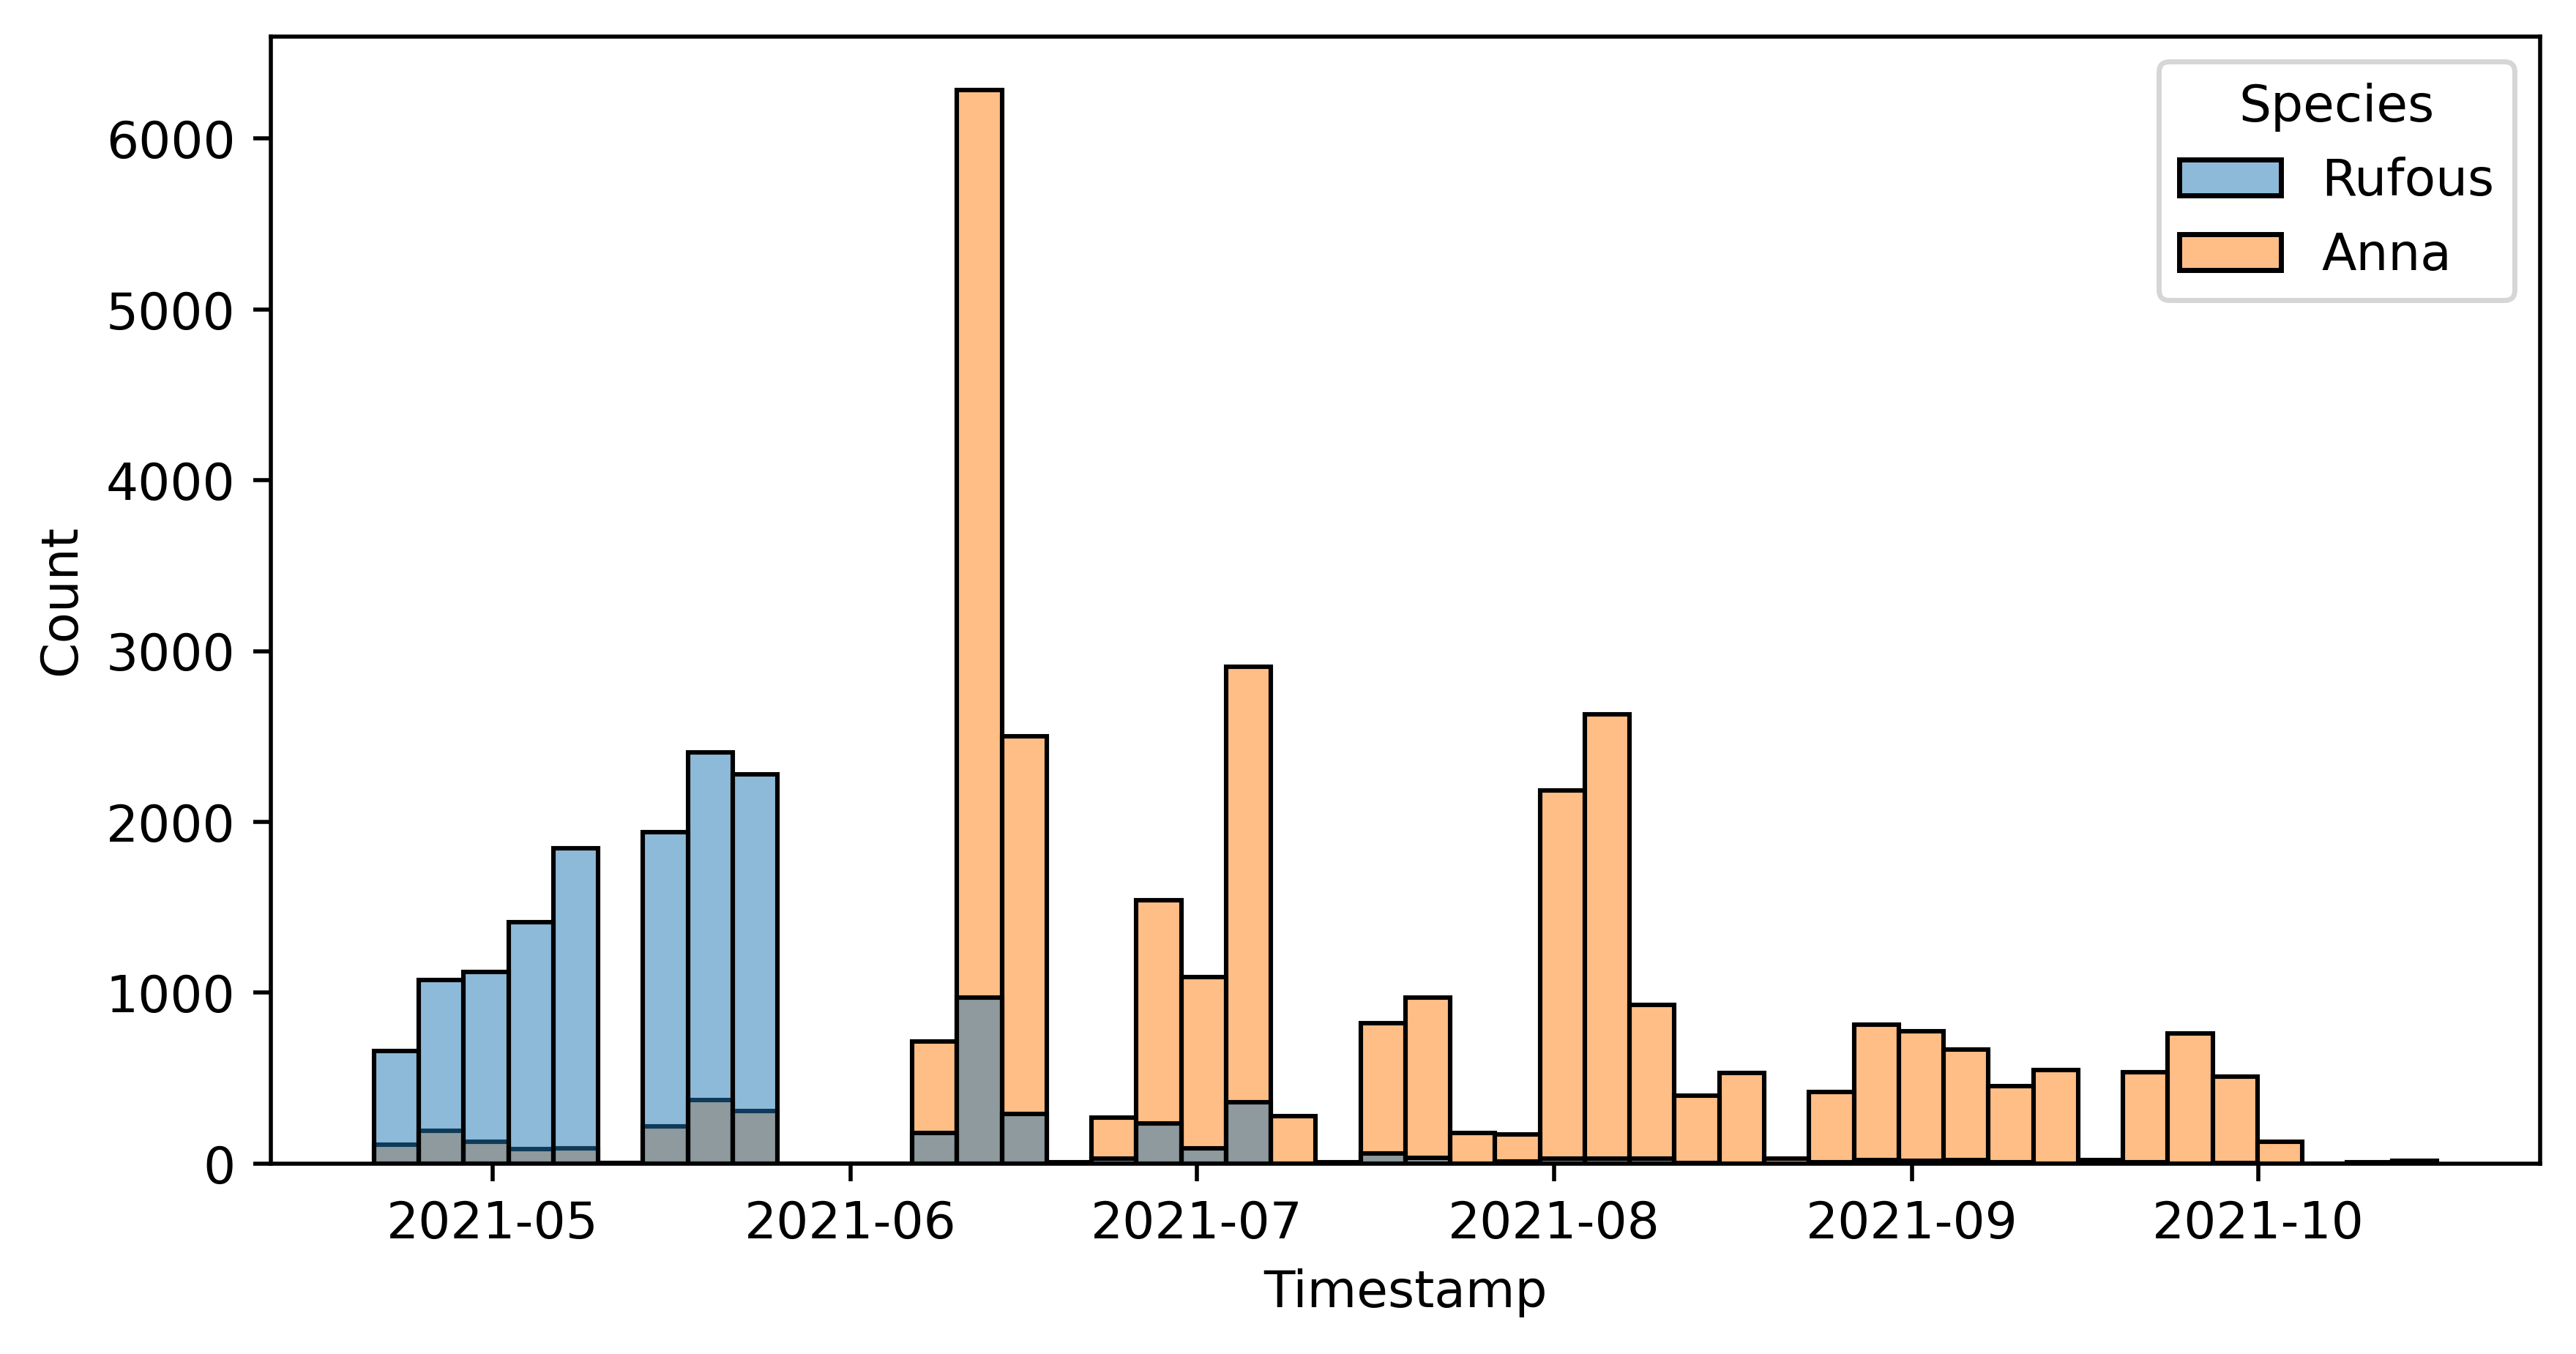

In [24]:
sns.histplot(data, x = 'Timestamp', hue ='Species');

### Conclusion: Rufous migrate away around June, then Annas arrive

(0.0, 24.0)

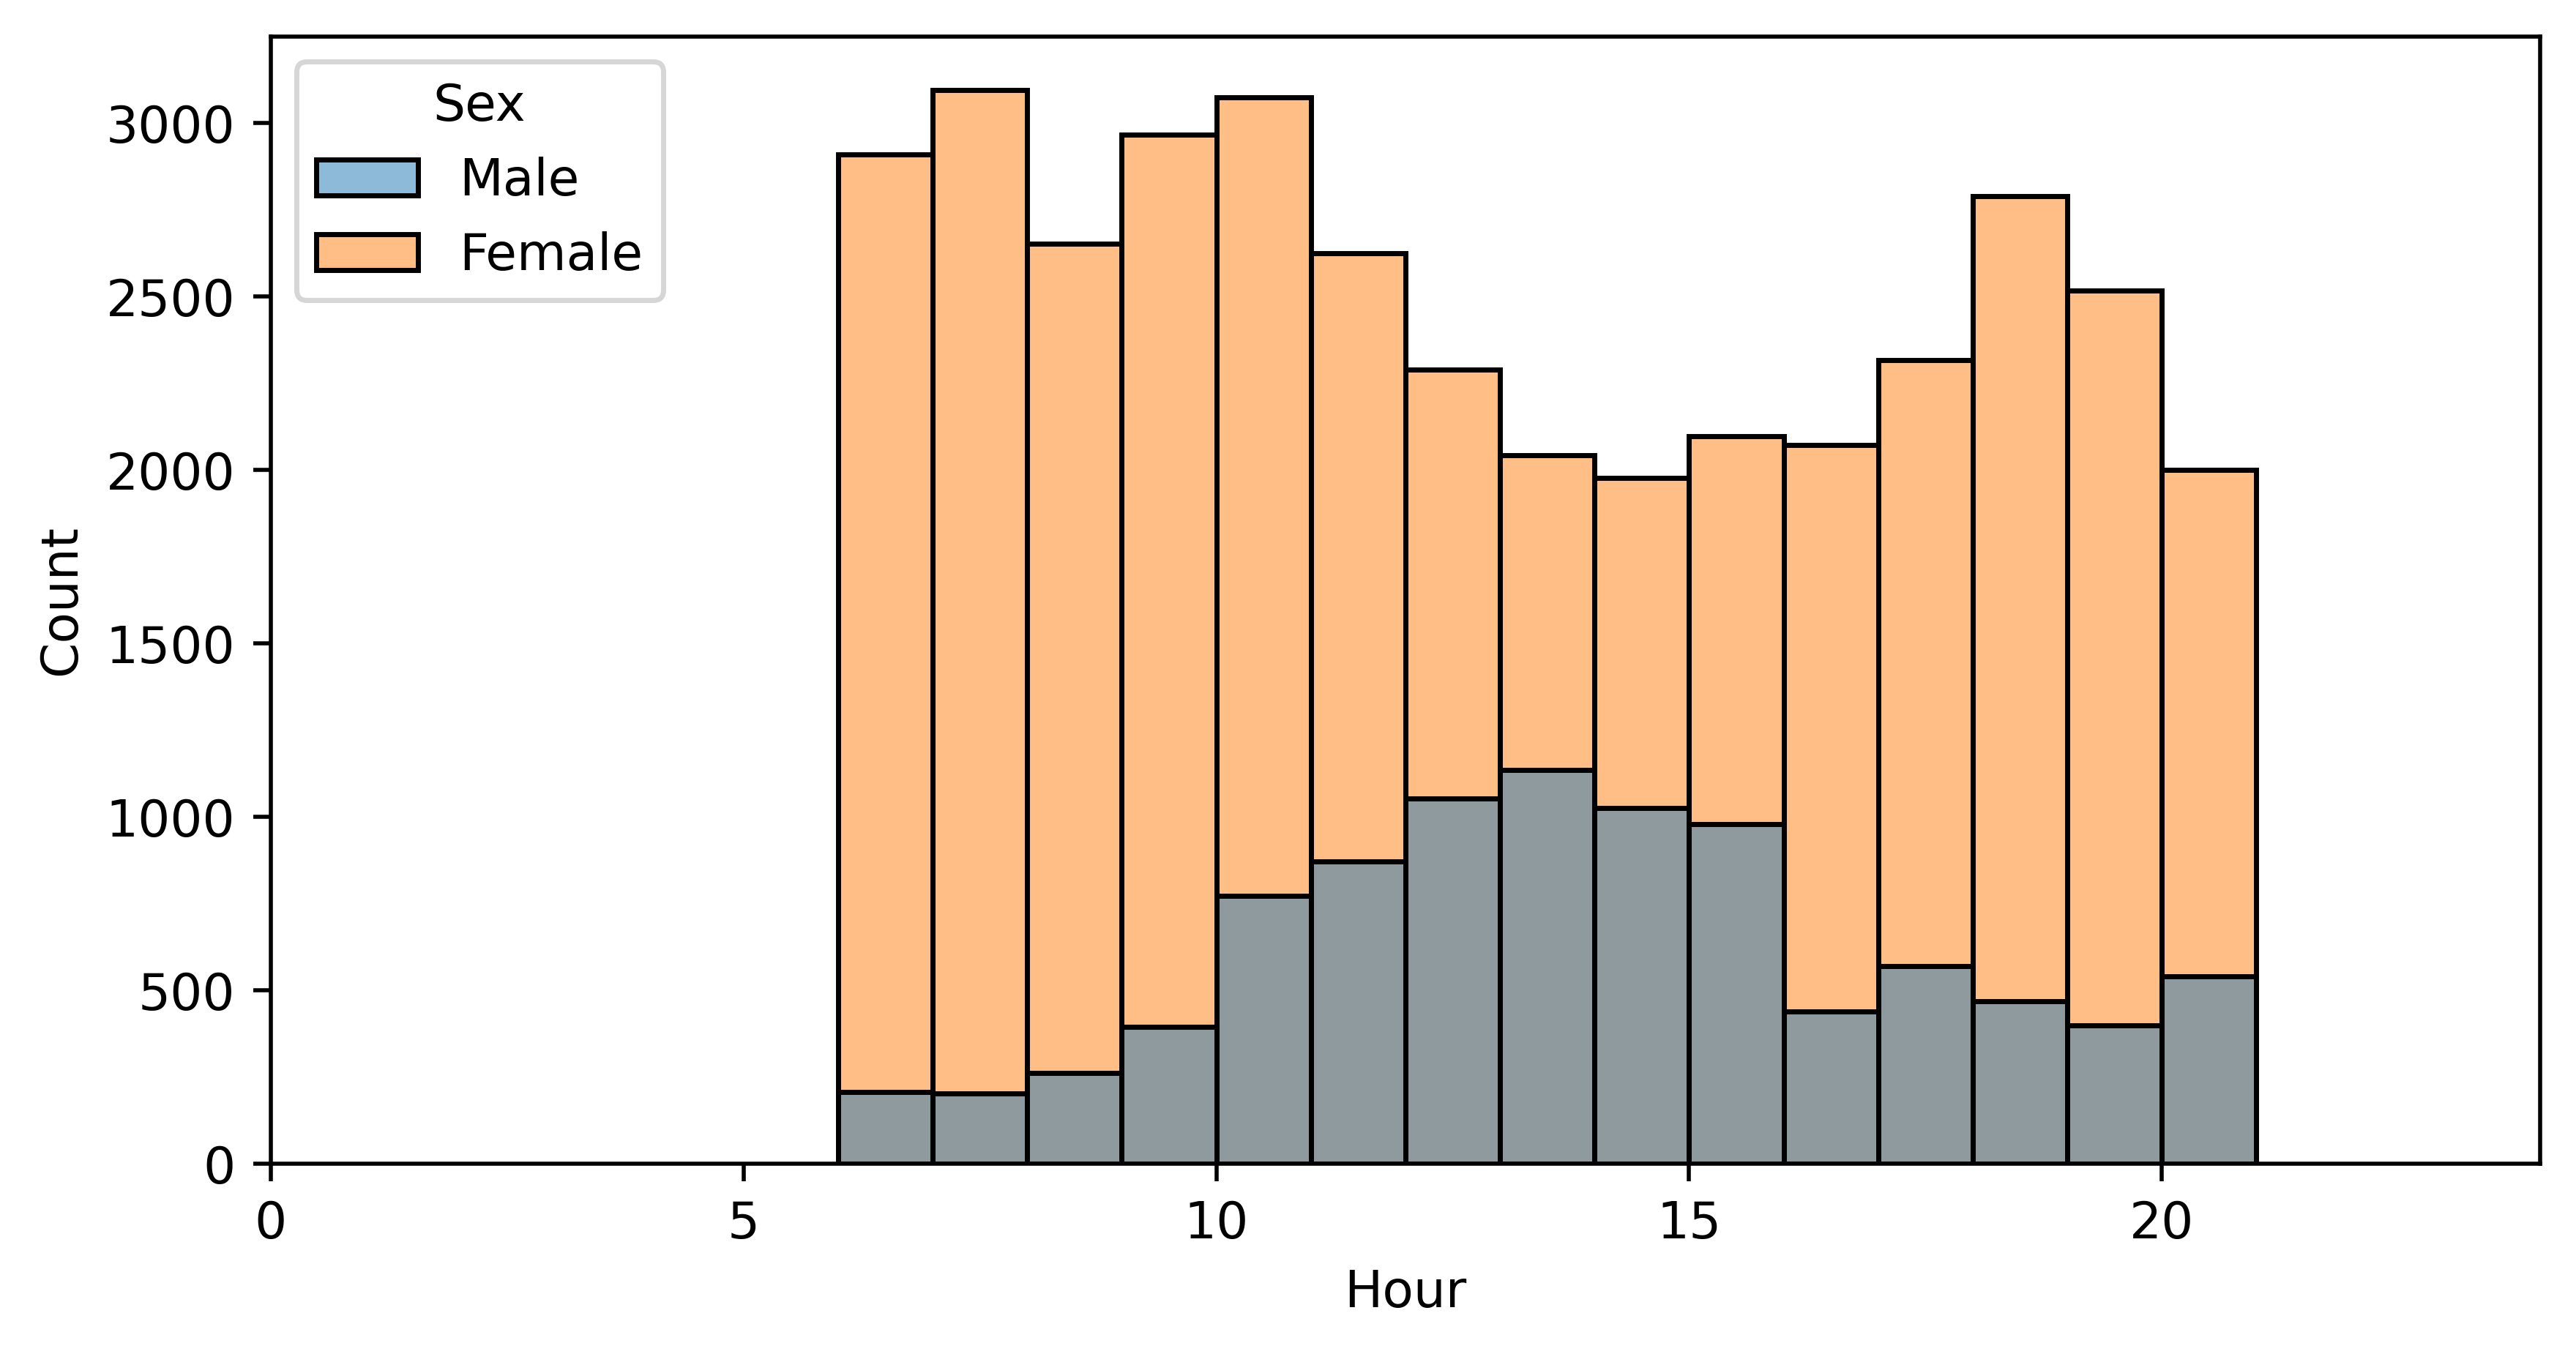

In [25]:
sns.histplot(data, x='Hour', binwidth=1, hue = "Sex");
plt.xlim(0,24)

# Story telling plots

## Conclusions our plots should hightlight: 

* Species visit at different times of the year
* Male & female Annas visit at different times of the day
* Temperature and migration are confounded

## Visual encoding 

![](https://www.oreilly.com/api/v2/epubs/9781466508910/files/image/fig5-1.png)

Visualization Analysis and Design by Tamara Munzner

In [26]:
# Colour pallettes
species_pal = {'Anna':'#226F54', 'Rufous':'#DA7635'}  # green & orange
anna_pal = {'Male': '#1D5D47', 'Female': '#92DDC3'}   # dark & light green
rufous_pal = {'Male': '#793E16', 'Female': '#E39764'} # dark & light orange

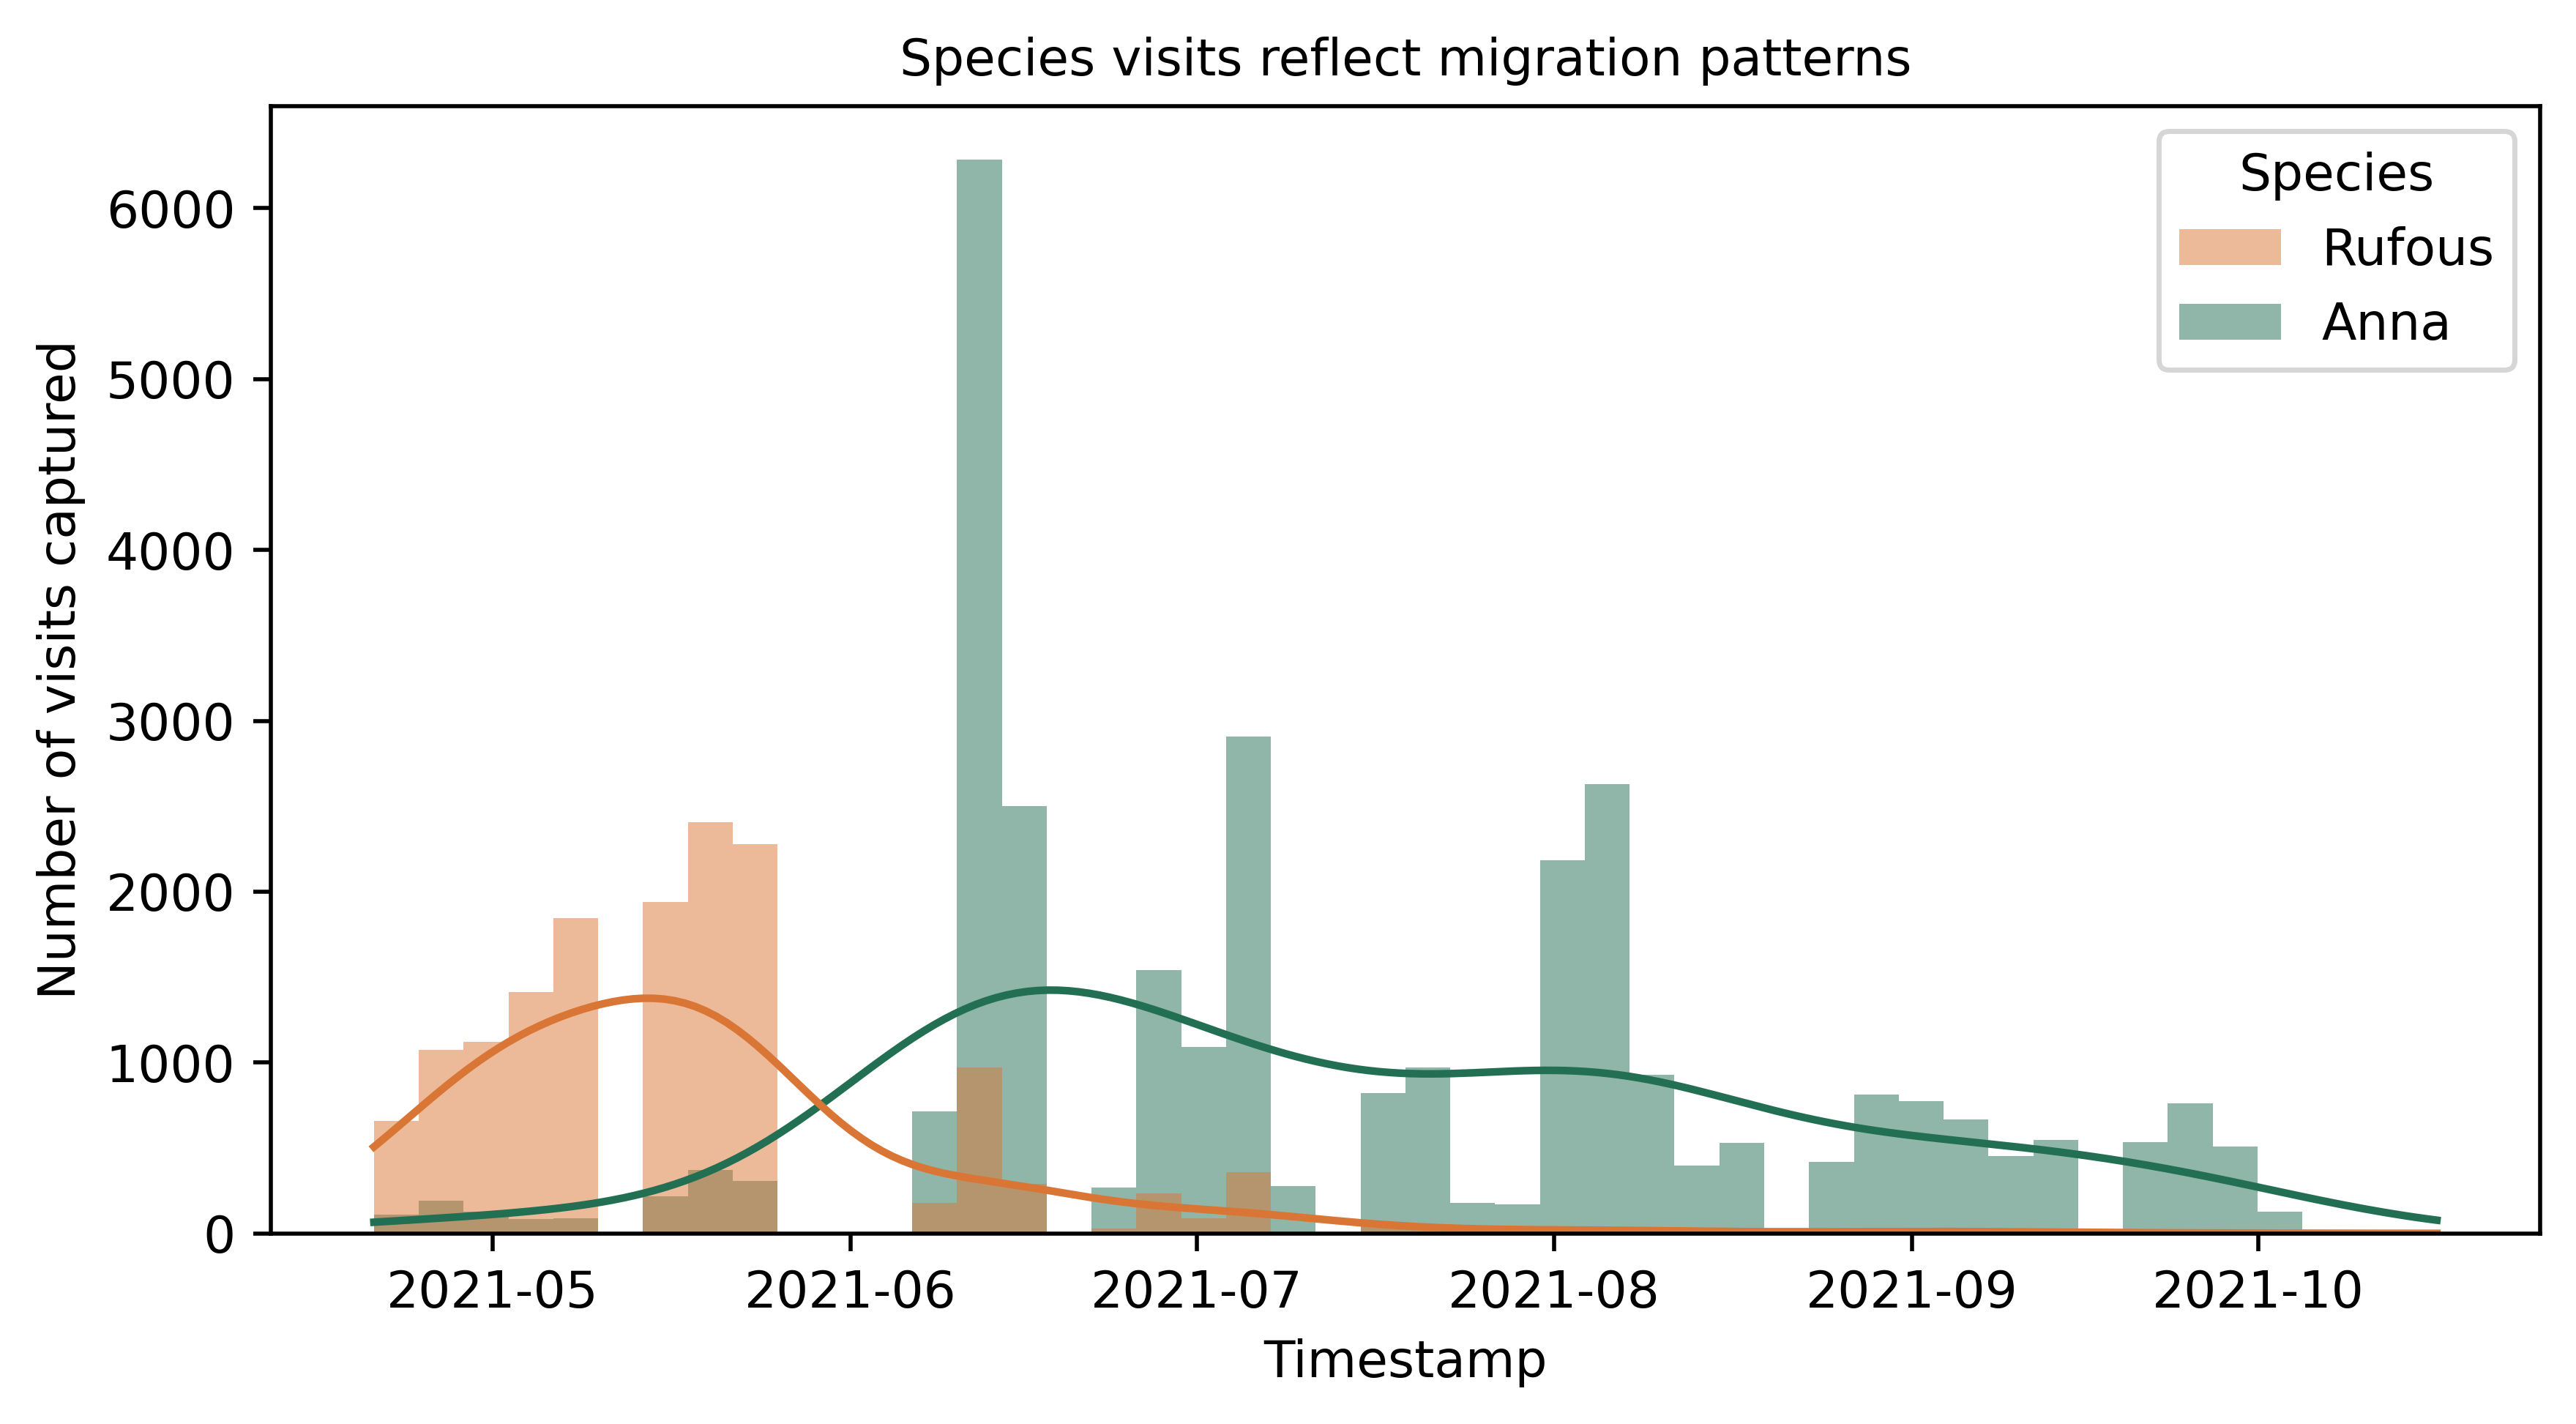

In [27]:
fig, ax = plt.subplots(1,1)
sns.histplot(data, x = 'Timestamp', hue='Species', edgecolor=None,  palette=species_pal, kde=True, kde_kws={'bw_adjust':3})
ax.set_ylabel('Number of visits captured')
plt.title('Species visits reflect migration patterns', fontsize=10);

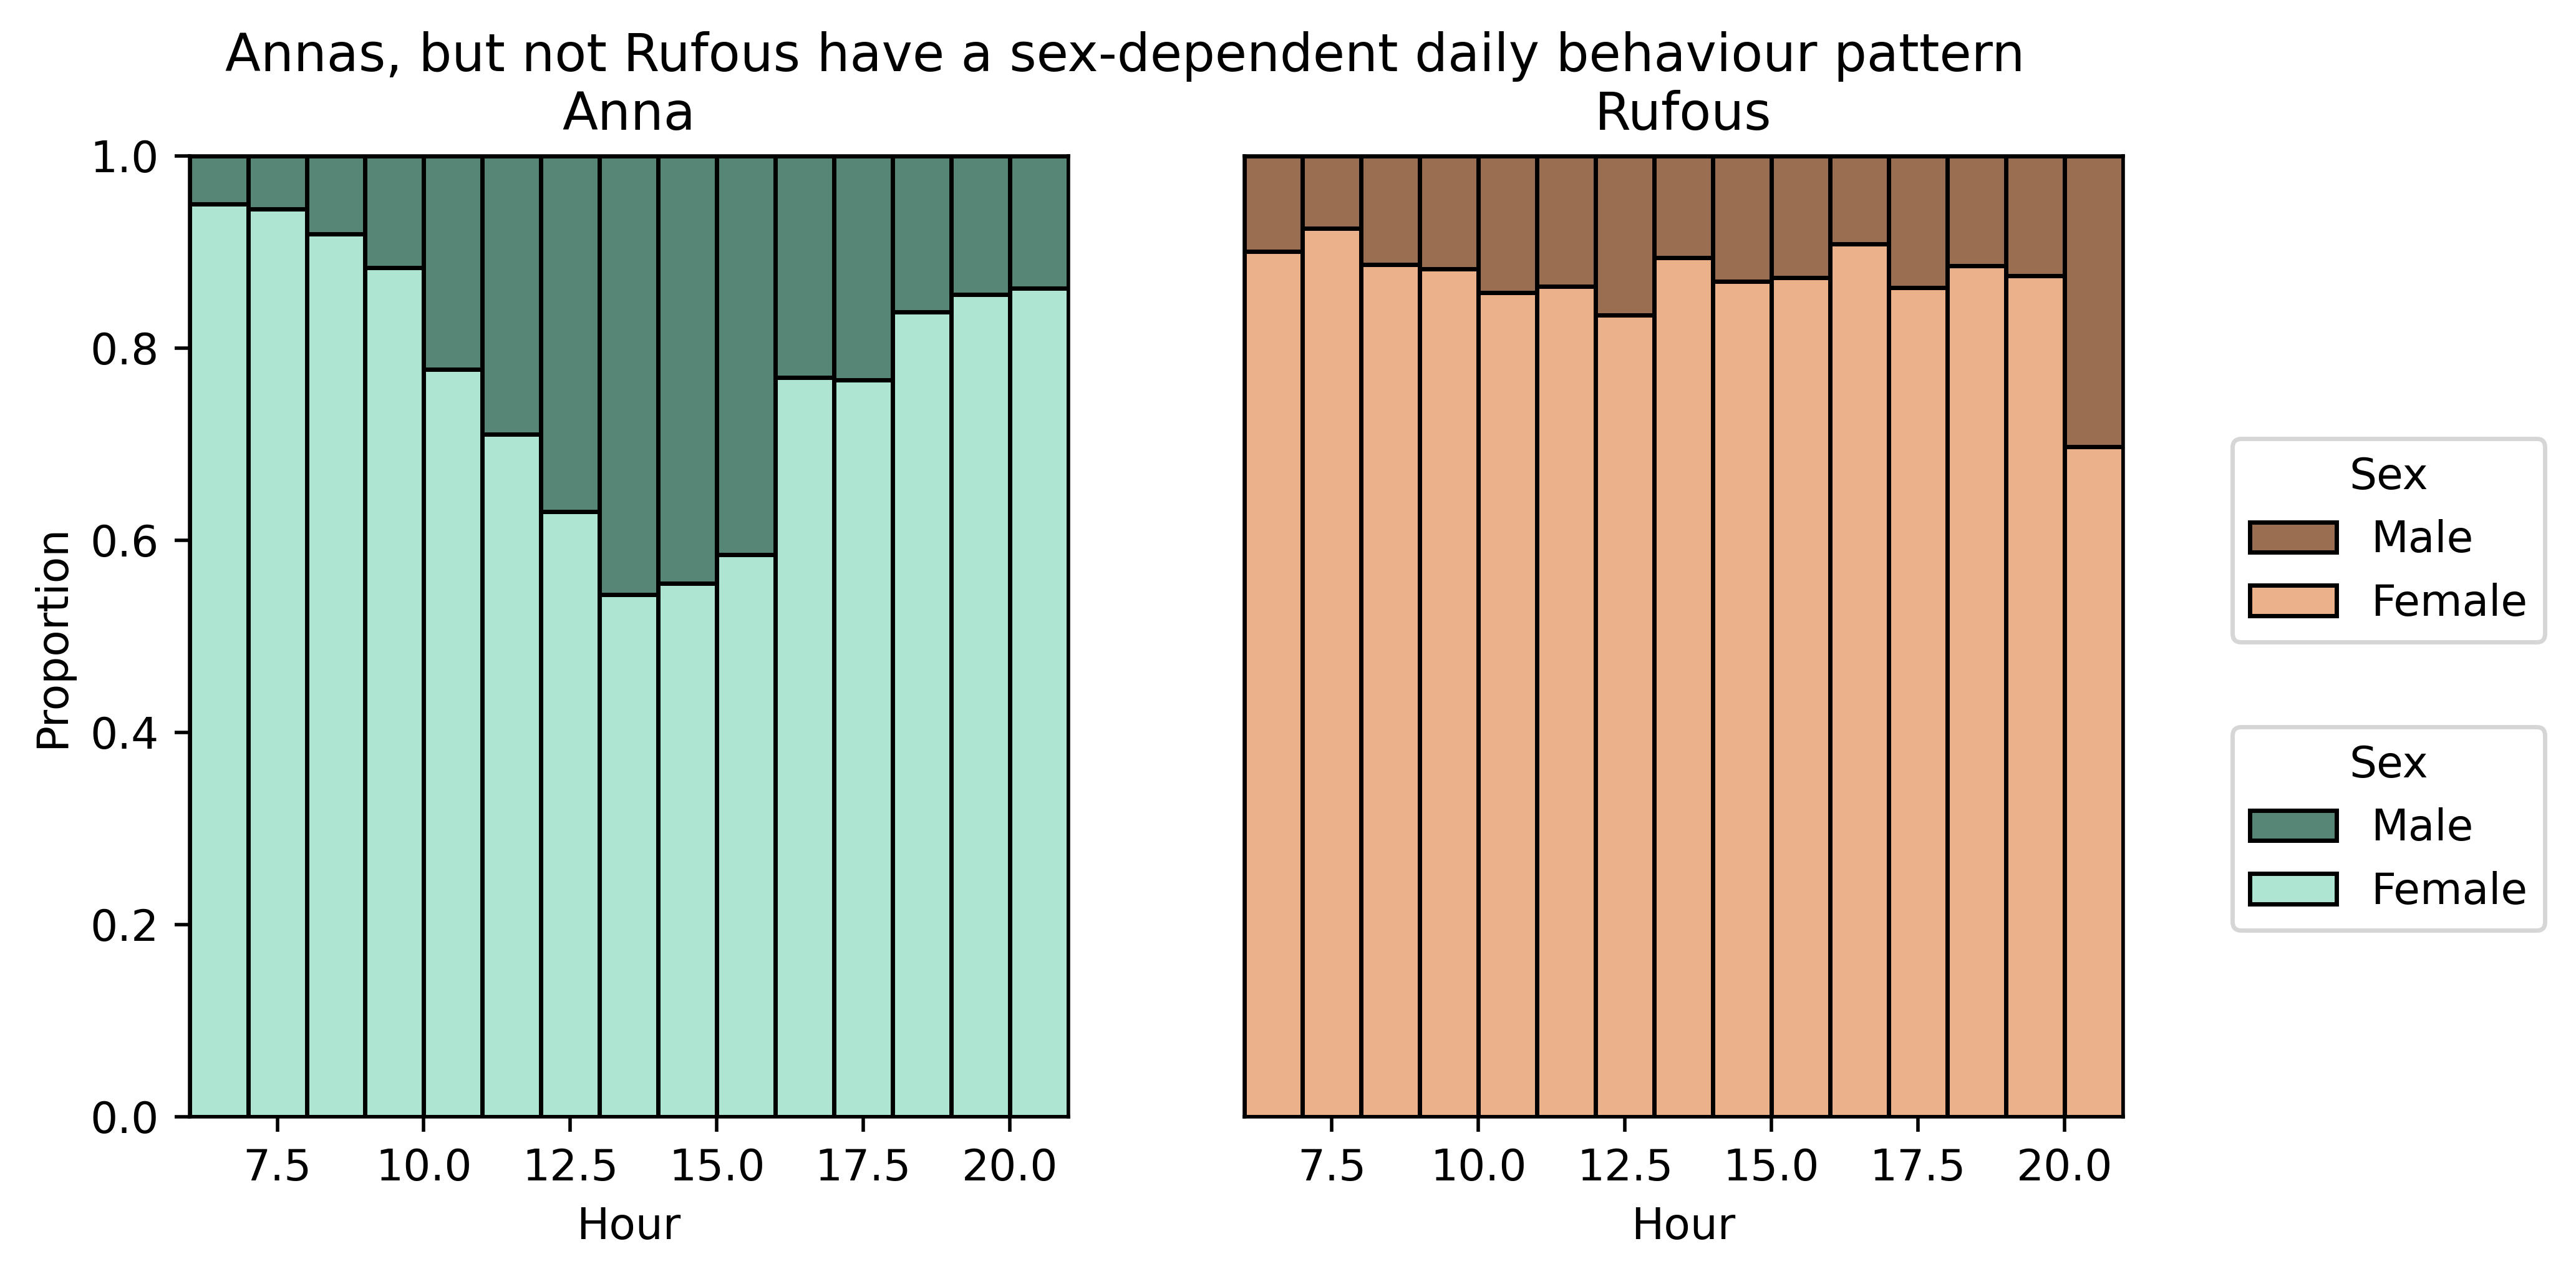

In [28]:
data['Hour'] = data.Timestamp.dt.hour
fix, ax = plt.subplots(1,2)
sns.histplot(data[data['Species'] == 'Anna'], x='Hour', hue = 'Sex', multiple="fill", stat="proportion", palette=anna_pal, binwidth=1, ax=ax[0])
sns.histplot(data[data['Species'] == 'Rufous'], x='Hour', hue = 'Sex', multiple="fill", stat="proportion", palette=rufous_pal, binwidth=1, ax=ax[1])
ax[0].set_title('Anna')
ax[1].set_title('Rufous')
ax[1].get_yaxis().set_visible(False)
sns.move_legend(ax[0], "center left", bbox_to_anchor=(2.3, 0.3))
sns.move_legend(ax[1], "center left", bbox_to_anchor=(1.1, 0.6))
plt.suptitle('Annas, but not Rufous have a sex-dependent daily behaviour pattern');

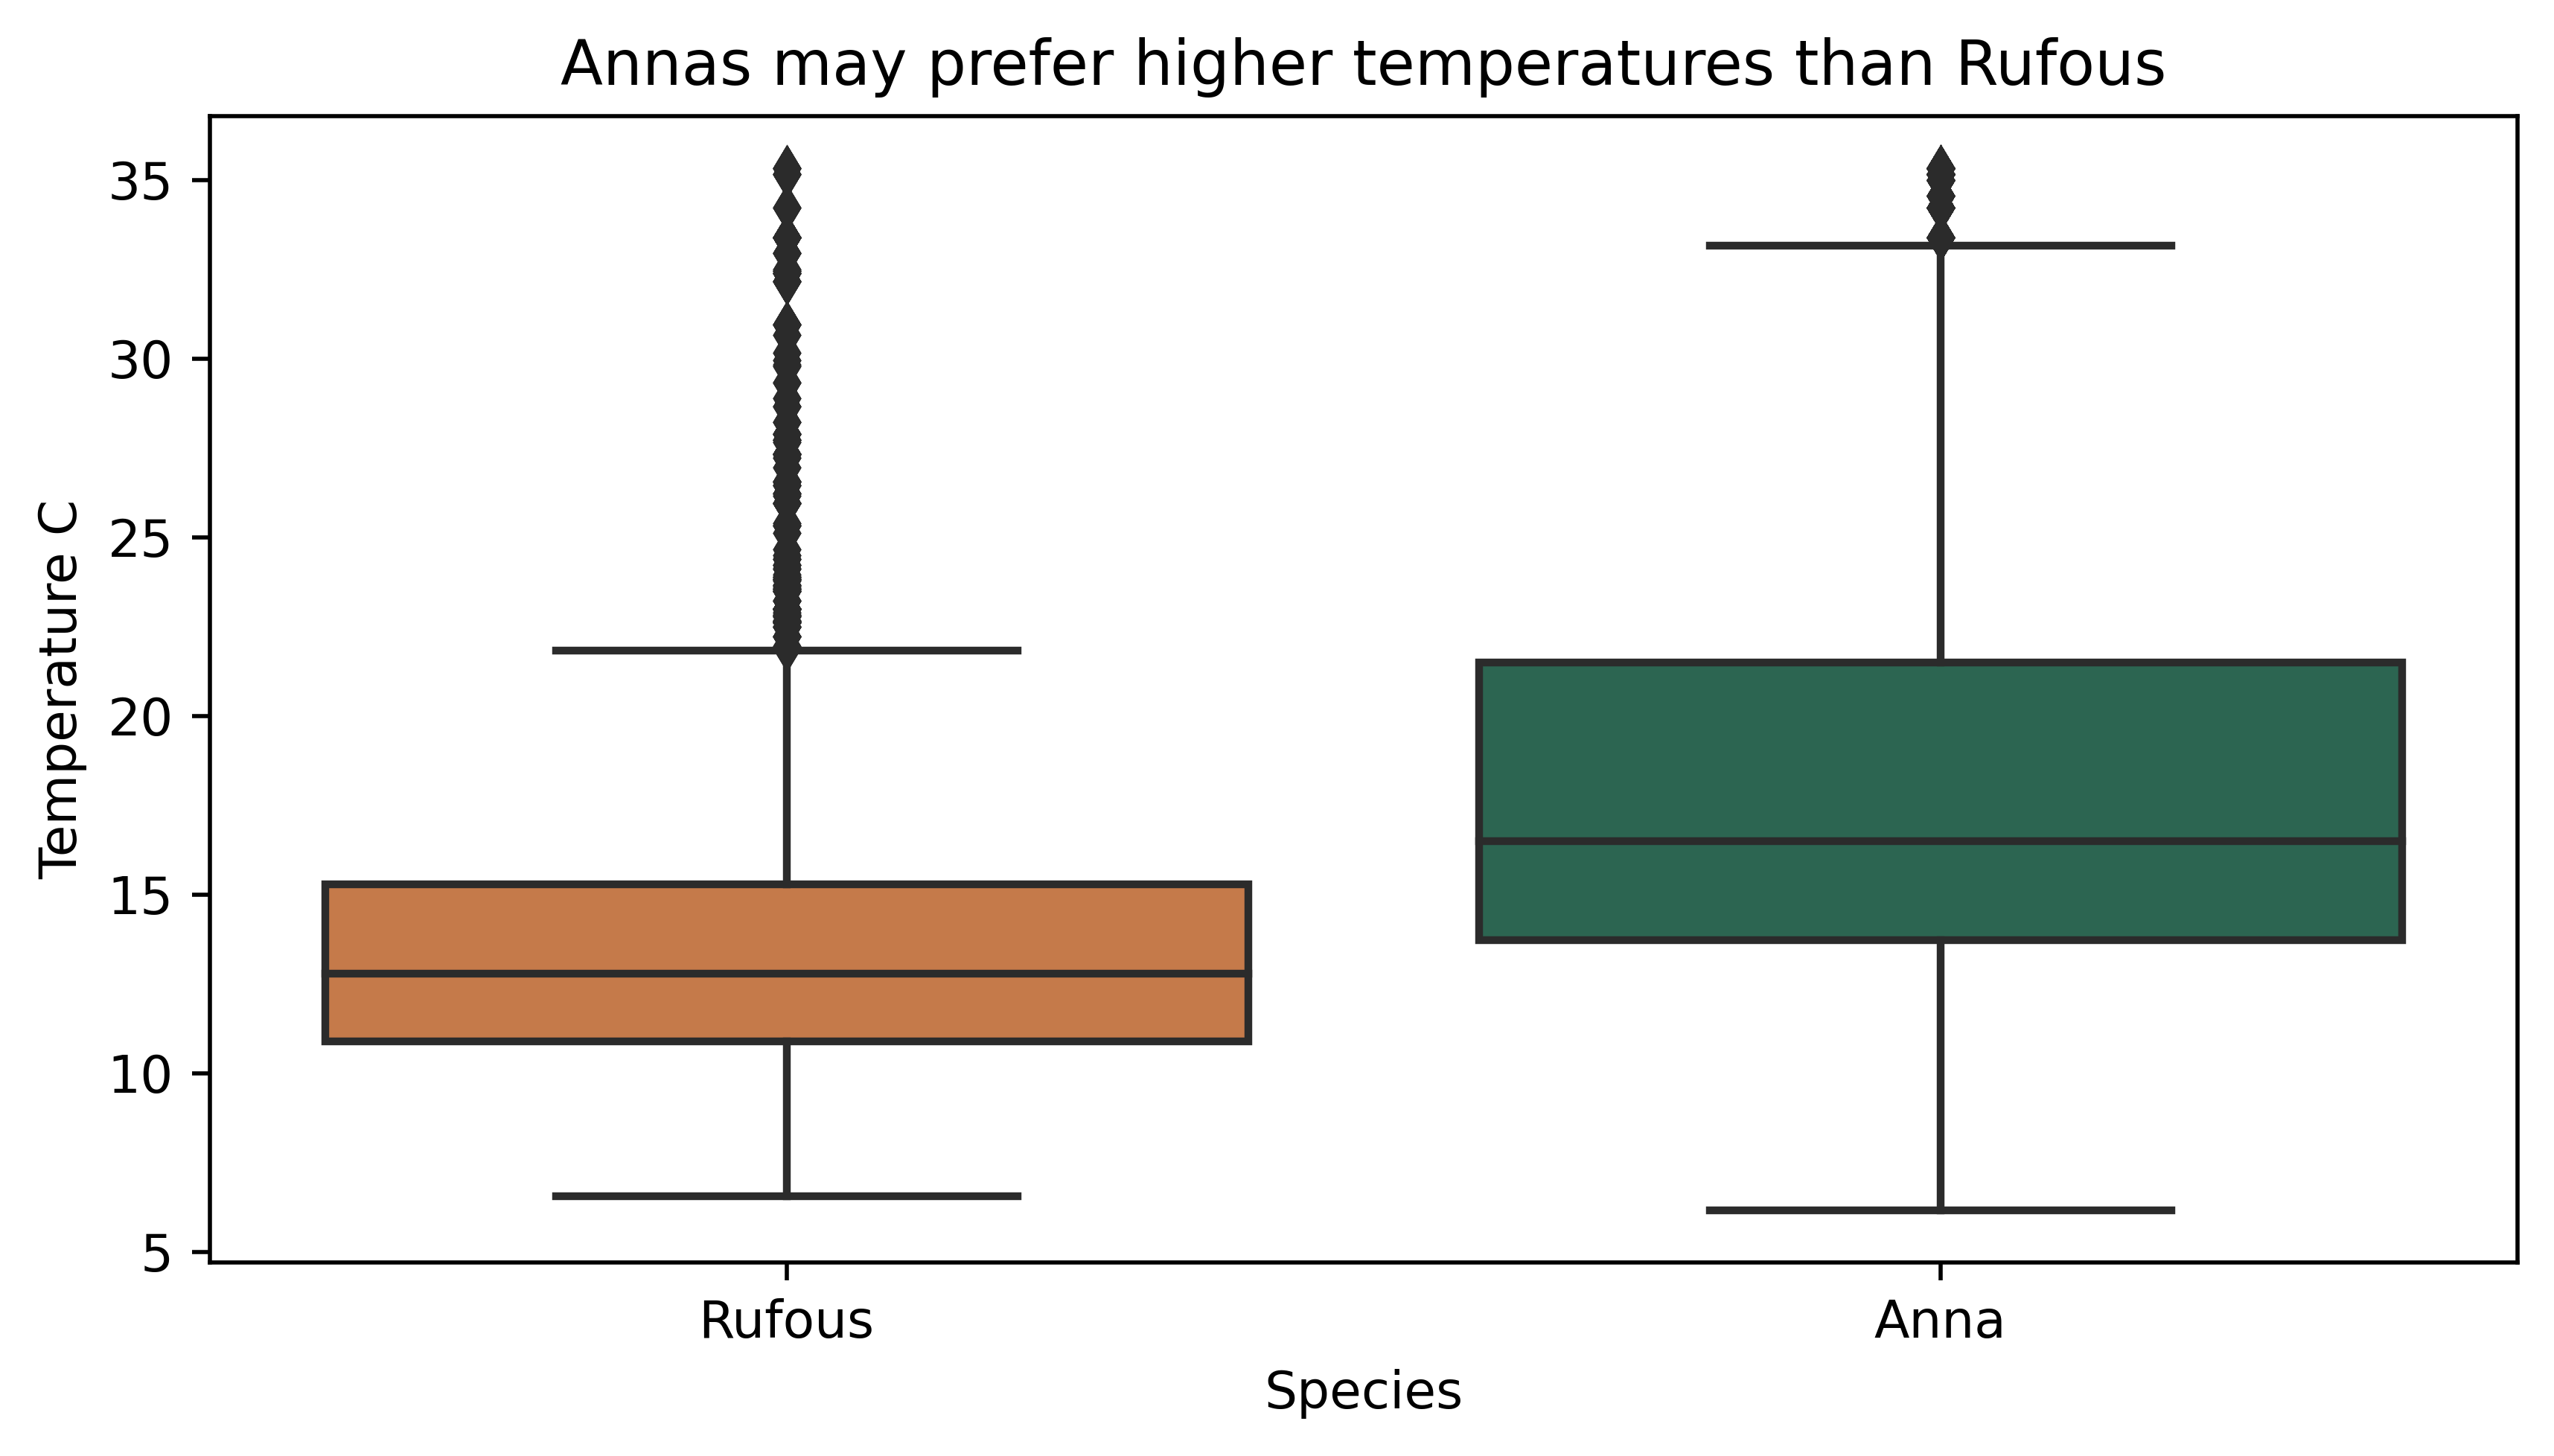

In [29]:
sns.boxplot(data, y='Temperature C', x = 'Species', palette=species_pal)
plt.title('Annas may prefer higher temperatures than Rufous');

In [30]:
from scipy.stats import ttest_ind
group1 = data['Temperature C'][(data['Species'] =='Anna')].dropna()
group2 = data['Temperature C'][(data['Species'] =='Rufous')].dropna()

ttest_ind(group1, group2)

Ttest_indResult(statistic=90.0467639582544, pvalue=0.0)

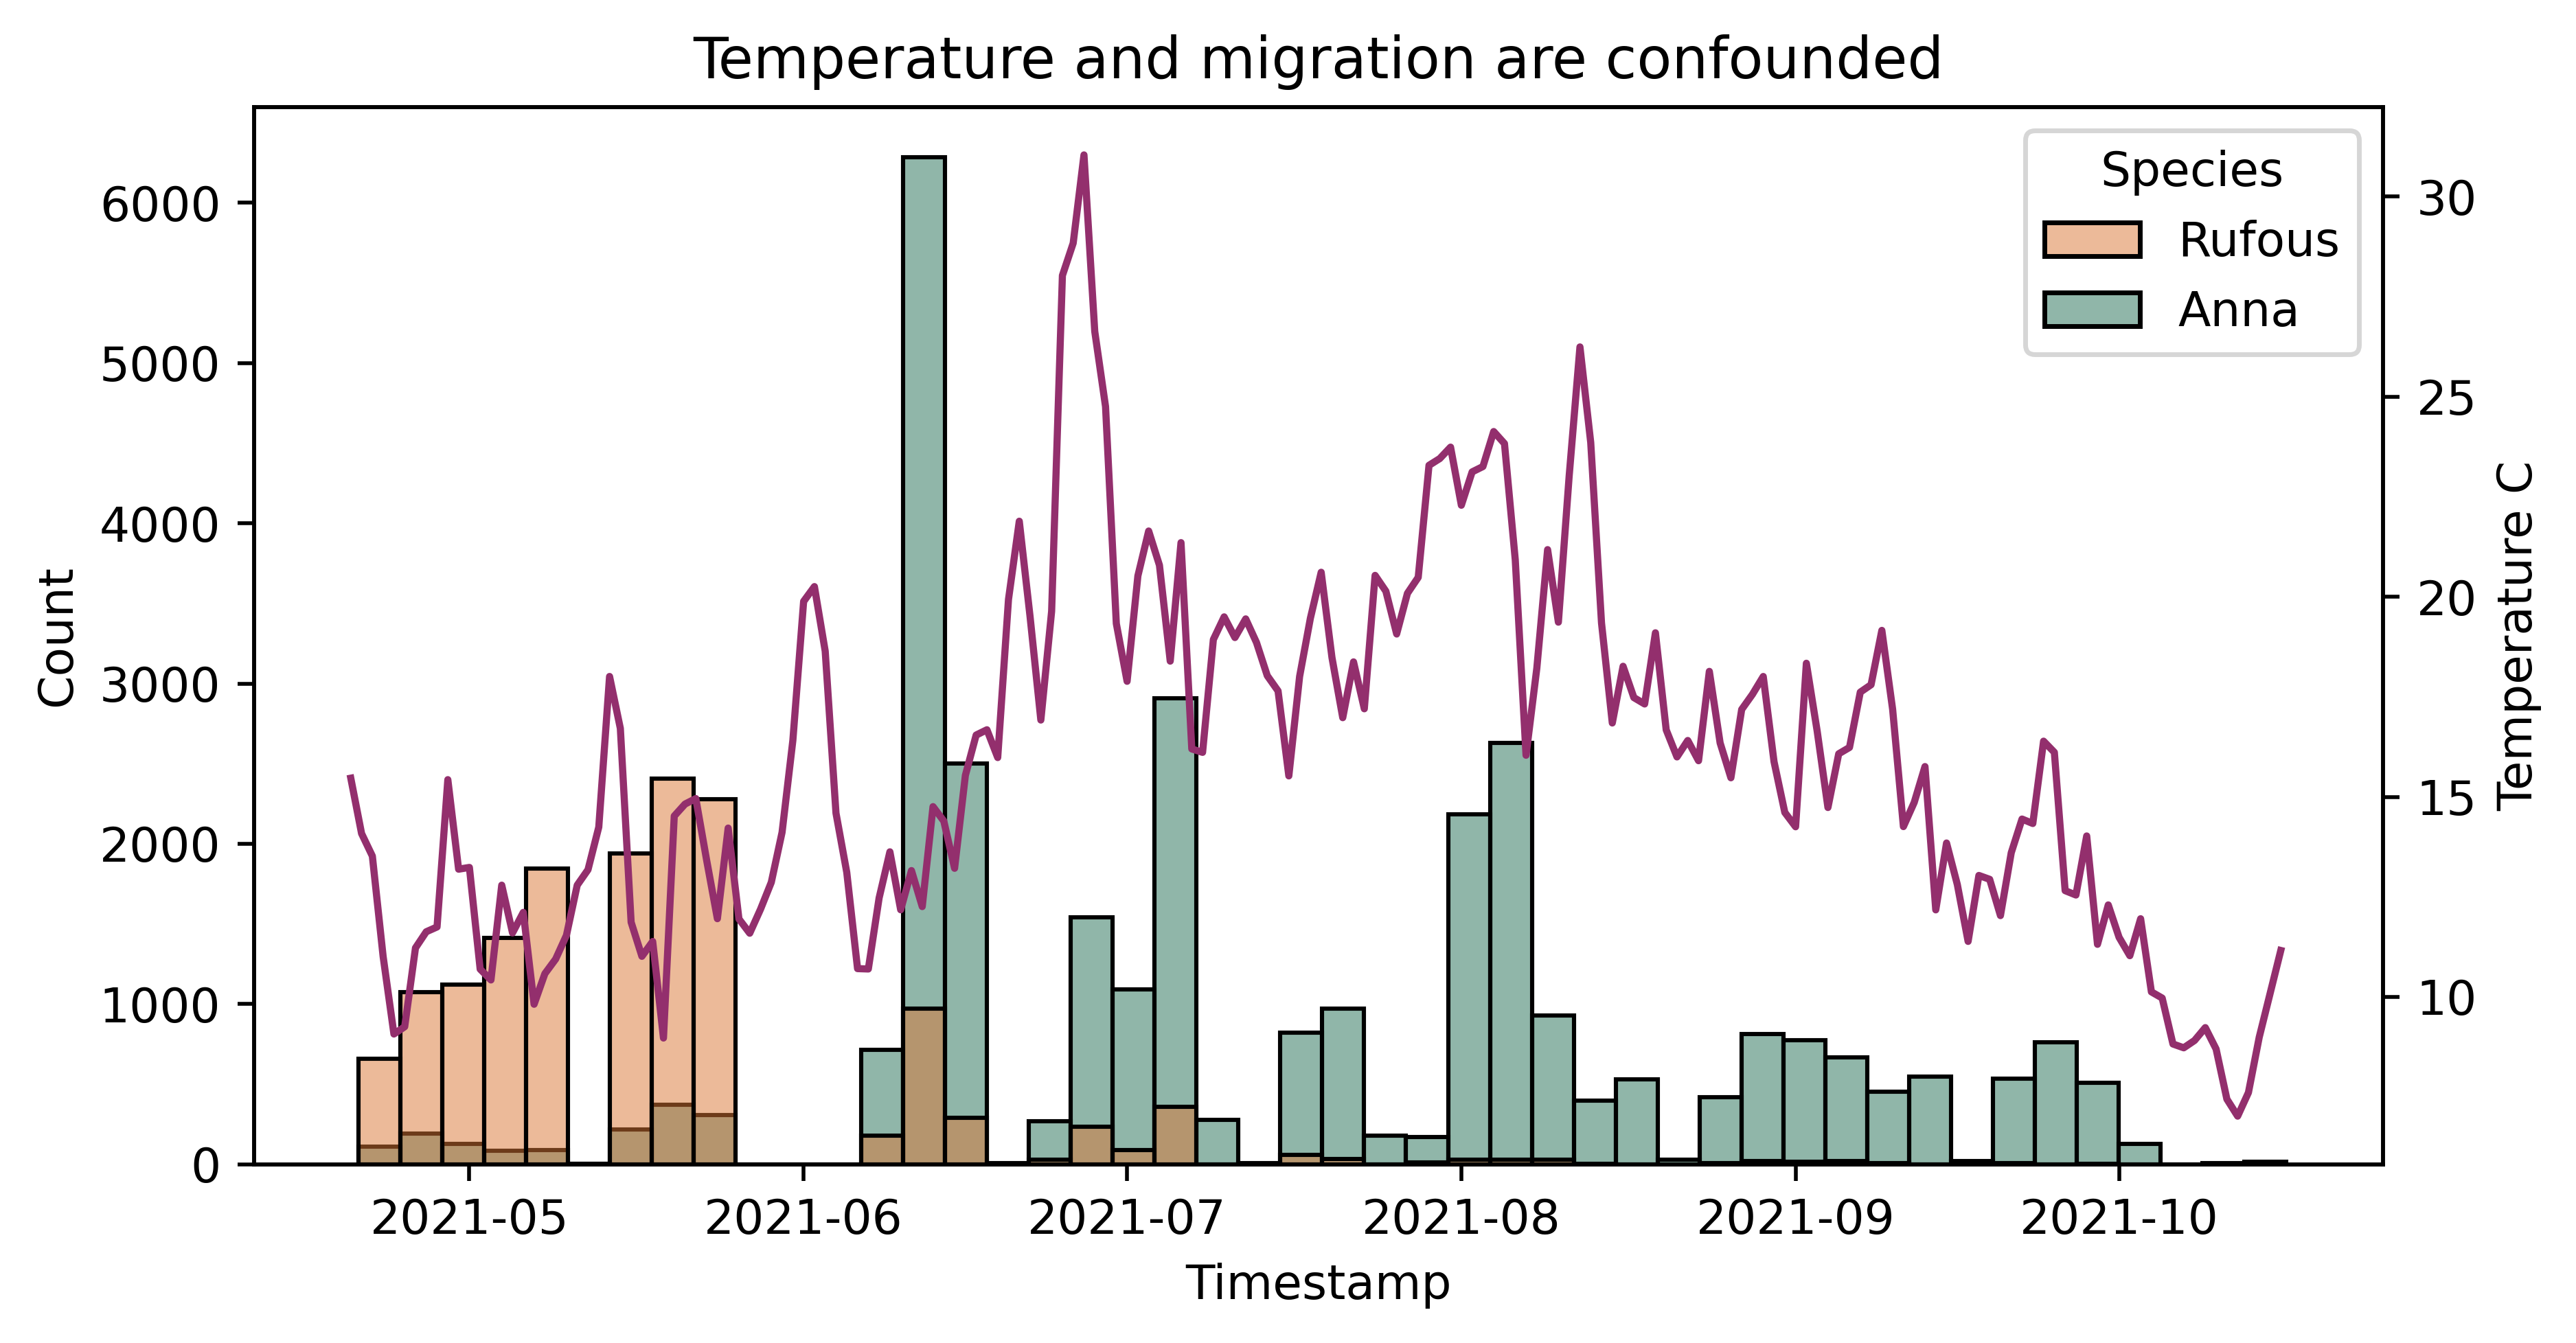

In [31]:
fig, ax = plt.subplots(1,1)
sns.histplot(data, x = 'Timestamp', hue ='Species', palette=species_pal)
ax2 = ax.twinx()
sns.lineplot(data, x='Date', y='Temperature C', ax = ax2, ci=False, color ='#932F6D');
plt.title("Temperature and migration are confounded");

### These plots are far from perfect from a design perspective, but the point is to show the distinction between the EDA iteration and story telling. 

![](https://github.com/harrig12/hummingbird_eda/blob/main/images/story_plots.png?raw=true)

# Thanks!

### Find these slides at:  https://caitharrigan.ca/slides/hummingbird_eda.slides.html

![](https://github.com/harrig12/hummingbird_eda/blob/main/images/slides_qr.jpg?raw=true)
